Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [8]:
import pandas as pd
Data_Dictionary=pd.read_excel('Election_Data (1).xlsx',sheet_name=0)
for i in range(0,8):
    print(Data_Dictionary.iloc[i,0])

1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.


In [19]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [38]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df.shape

(1525, 9)

In [29]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df.duplicated().sum()

8

In [33]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df.shape

(1517, 9)

In [34]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [35]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [36]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic.cond.national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic.cond.household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political.knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

Features shows slightly right skewness except ‘Blair’ and ‘Political.Knowledge’ feature as the mean of the feature is greater than median. In the case of Blair and political knowledge feature, mean is slightly lesser than median. 

In [37]:
import pandas as pd
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df.describe(include='object').T

count unique     top  freq
vote    1517      2  Labour  1057
gender  1517      2  female   808

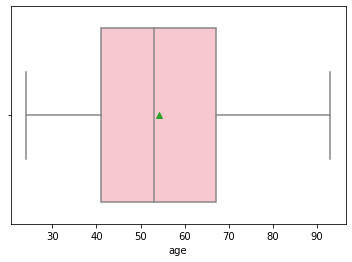

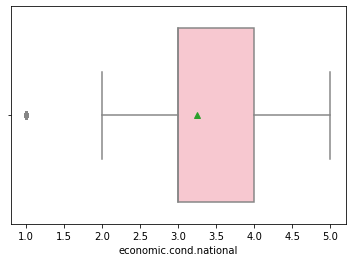

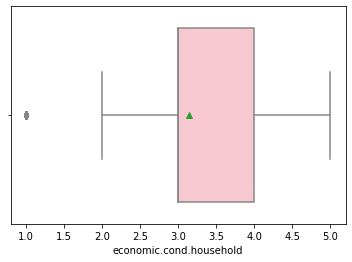

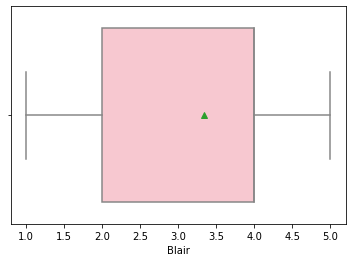

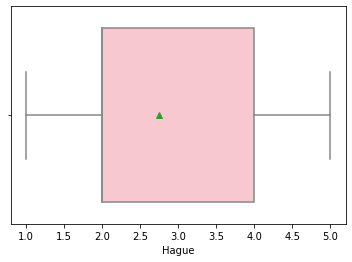

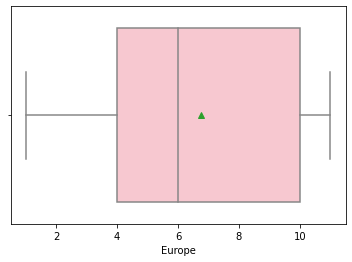

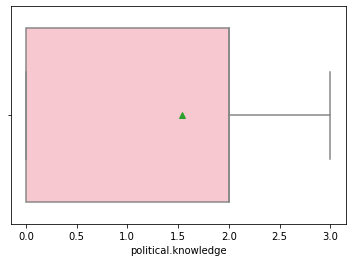

In [111]:
x=df.select_dtypes(include=['int64'])

for i in x.columns:
    sns.boxplot(df[i],showmeans=True,color='pink')
    plt.show()

- The dataset contains 1525 voters and 9 features.There are 8 duplicated entries. By ignoring those 8 entries 1517 voters details can be processed further.
- There are 2 object Datatype and remaining are numeric datatype
- There are no null values present in this datatype

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

Description of age before processing
---------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64
Histogram of age before processing
+++++++++++++++++


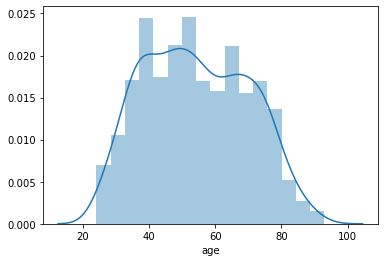

Boxplot of age before processing
***************


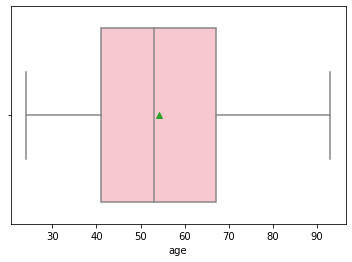

Description of economic.cond.national before processing
---------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64
Histogram of economic.cond.national before processing
+++++++++++++++++


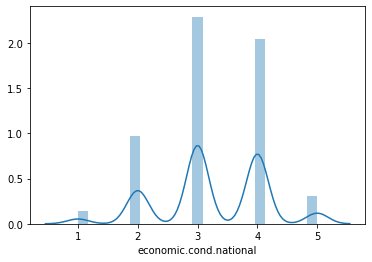

Boxplot of economic.cond.national before processing
***************


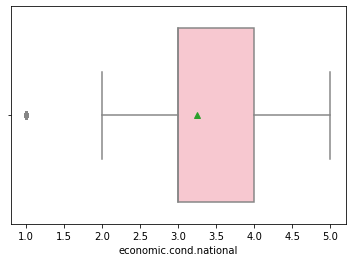

Description of economic.cond.household before processing
---------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64
Histogram of economic.cond.household before processing
+++++++++++++++++


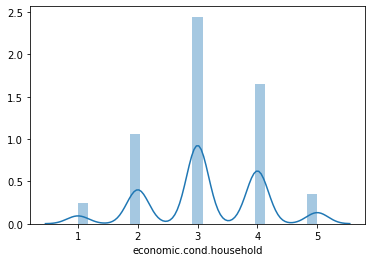

Boxplot of economic.cond.household before processing
***************


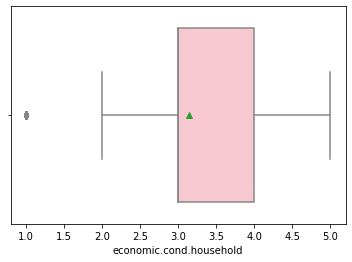

Description of Blair before processing
---------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64
Histogram of Blair before processing
+++++++++++++++++


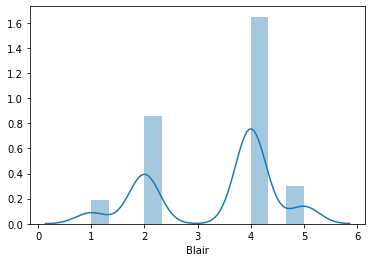

Boxplot of Blair before processing
***************


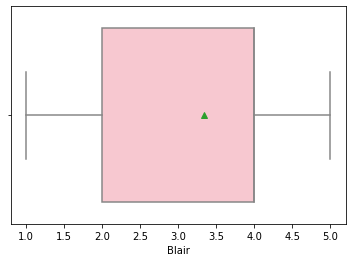

Description of Hague before processing
---------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64
Histogram of Hague before processing
+++++++++++++++++


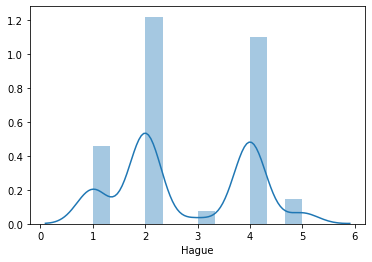

Boxplot of Hague before processing
***************


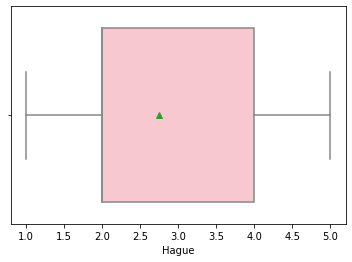

Description of Europe before processing
---------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64
Histogram of Europe before processing
+++++++++++++++++


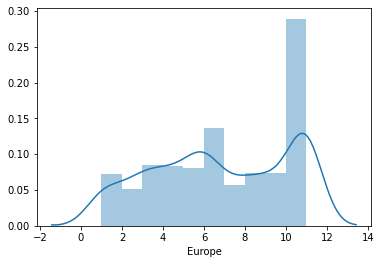

Boxplot of Europe before processing
***************


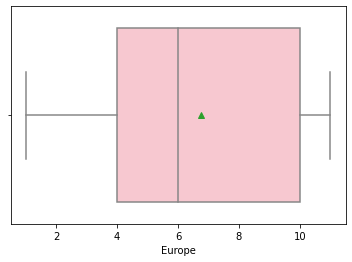

Description of political.knowledge before processing
---------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64
Histogram of political.knowledge before processing
+++++++++++++++++


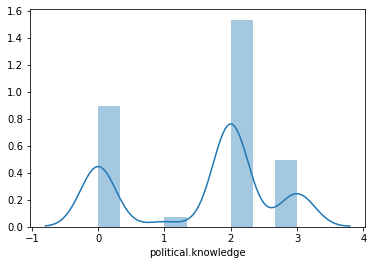

Boxplot of political.knowledge before processing
***************


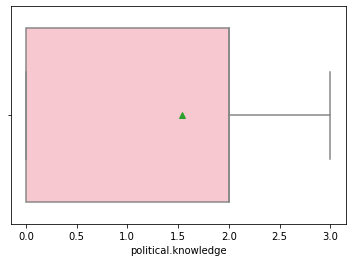

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
x=df.dtypes[df.dtypes=='int64']
x.index.values
j=1

# for i in x.index.values:
#     print('Histogram of {}'.format(i))
# #     plt.figure(figsize=(10,5))
#     plt.subplot(4,2,j)
#     sns.distplot(df[i])
# #     plt.figure(figsize=(10,5))
#     plt.subplot(4,2,j+1)
#     sns.boxplot(df[i],showmeans=True,color='pink')
#     plt.show()
# #     plt.tight_layout()
#     j=j+1

a=df.select_dtypes(include=['float64','int64'])

for column in a.columns:
    print('Description of',column,'before processing')
    print('---------------------')
    print(a[column].describe())
    
    print('Histogram of',column,'before processing')
    print('+++++++++++++++++')
    sns.distplot(a[column])
    plt.show()
    
    print('Boxplot of',column,'before processing')
    print('***************')
    sns.boxplot(a[column],showmeans=True,color='pink')
    plt.show()

Voters age ranges from 24 to 93 with mean and median of 54 and 53 respectively. People with age 40, around 50, 65 to 70 voted more. 

Considering the factor Assessment of current national economic conditions, majority of voters provide the rating of 3 and 4. 

Considering the factor Assessment of current household economic conditions, majority of voters provide the rating of 3 and 4. 

Considering the factor political knowledge, voters rated as 0 and 2 for the candidates. 

Considering respondents attitude towards European integration, most of the voters responded with 11. 

Considering the factor assessment of conservative leader, most of the voters responded with 2 and 4. 

Considering the factor assessment of labor leader, most of voters responded with 4 as maximum and 2 as a second maximum. 

Apart from age, all other numeric shows are discrete in histogram. 

Apart from Assessment of current national economic conditions and assessment of current household economic conditions, there are no outliers. The above-mentioned variables have only one outlier.

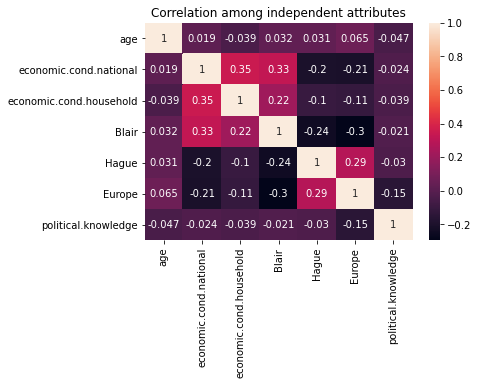

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation among independent attributes');

Assessment of current national economic conditions and Assessment of current household economic conditions are showing weak correlation. Similarly, assessment of current national economic conditions and assessment of labor leader (Blair) are showing weak correlation each other and Blair, Assessment of current household economic conditions are showing weak correlation. Hague and Blair are showing negative correlation. 

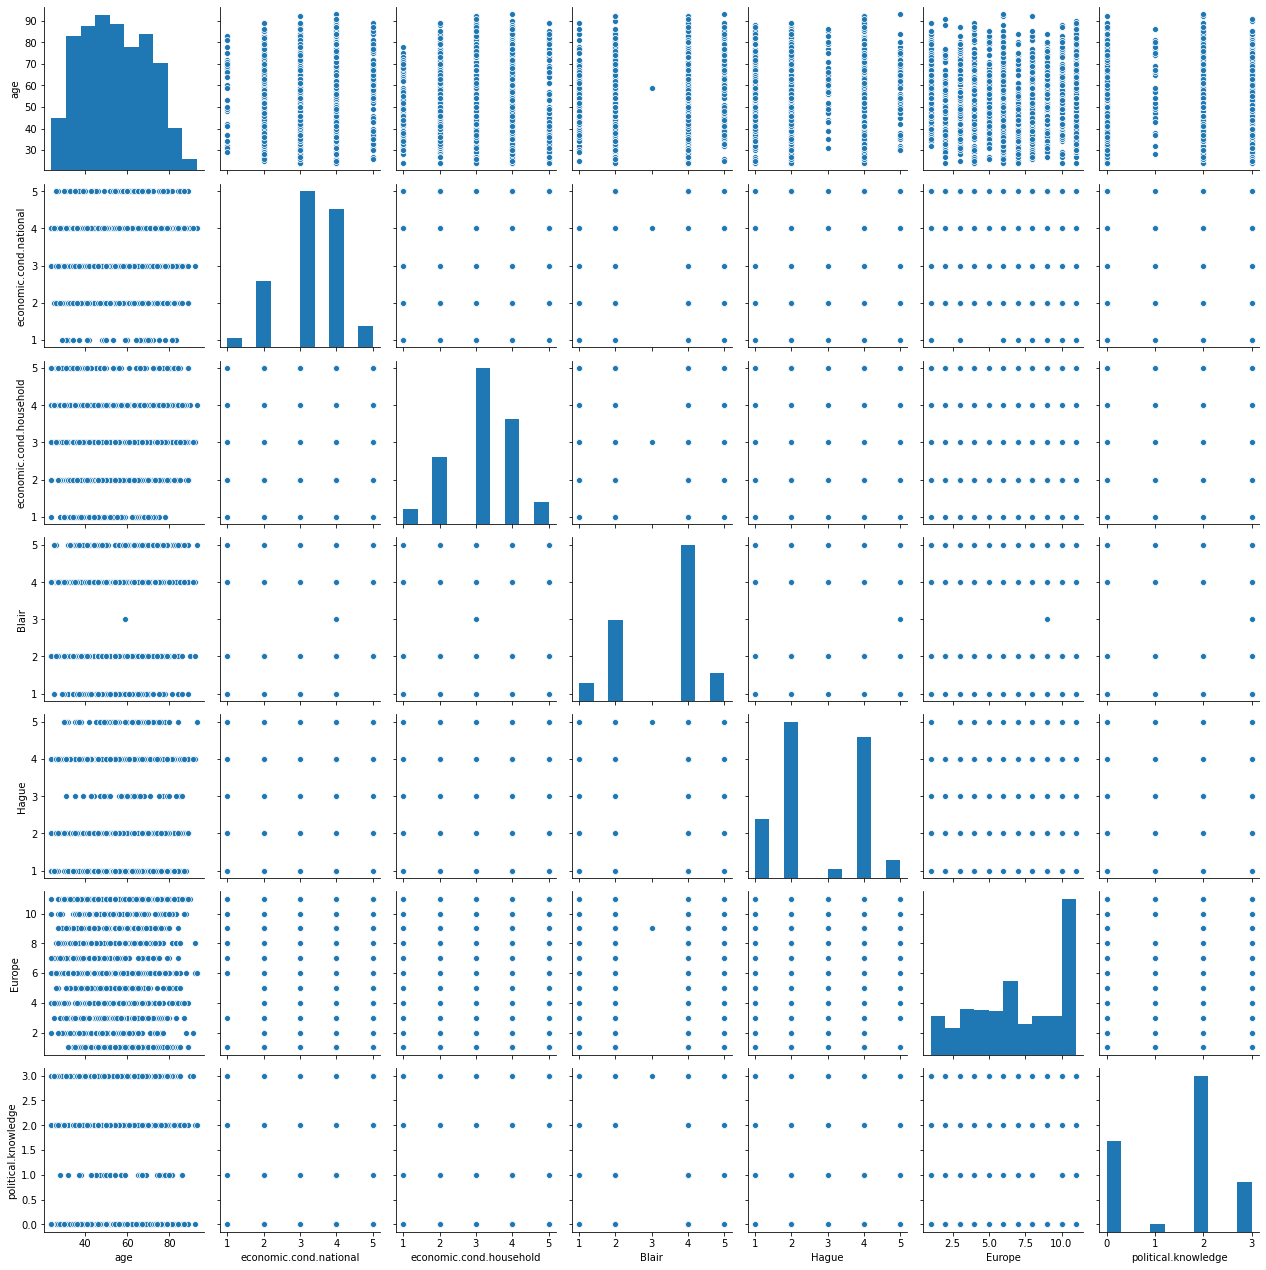

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.pairplot(df)

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

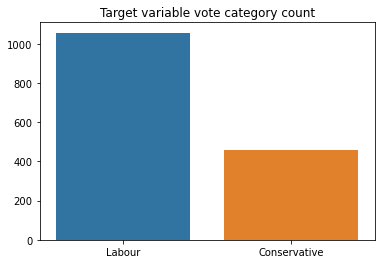

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(df['vote'].value_counts().index,df['vote'].value_counts().values)
plt.title('Target variable vote category count');

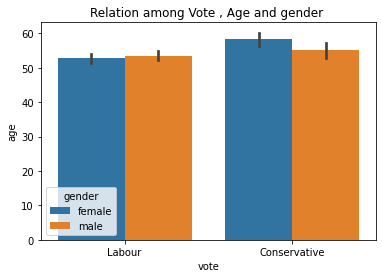

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(y=df['age'],x=df['vote'],hue=df['gender'])
plt.title('Relation among Vote , Age and gender ');

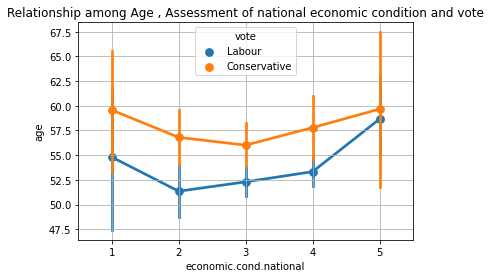

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.pointplot(y=df['age'],x=df['economic.cond.national'],hue=df['vote'])
plt.grid()
plt.title('Relationship among Age , Assessment of national economic condition and vote');

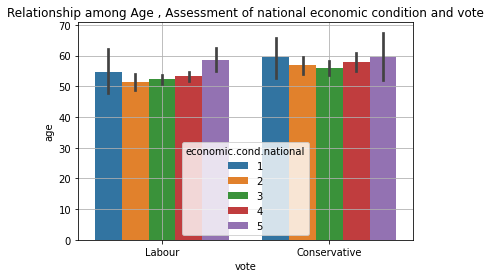

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(y=df['age'],hue=df['economic.cond.national'],x=df['vote'])
plt.grid()
plt.title('Relationship among Age , Assessment of national economic condition and vote');

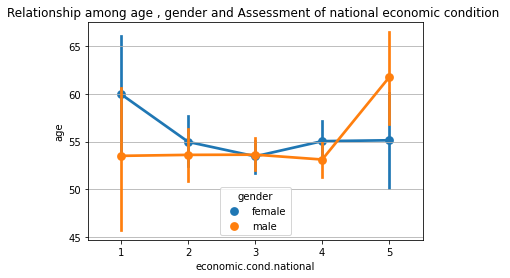

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
plt.grid()
sns.pointplot(y=df['age'],x=df['economic.cond.national'],hue=df['gender'])
plt.title('Relationship among age , gender and Assessment of national economic condition ');

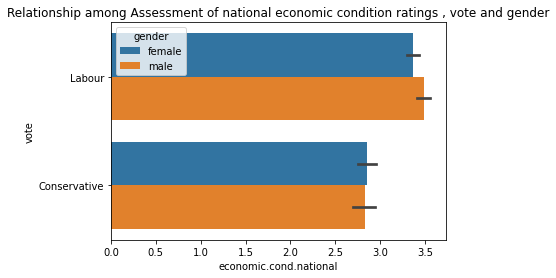

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(x=df['economic.cond.national'],y=df['vote'],hue=df['gender'])
plt.title('Relationship among Assessment of national economic condition ratings , vote and gender');

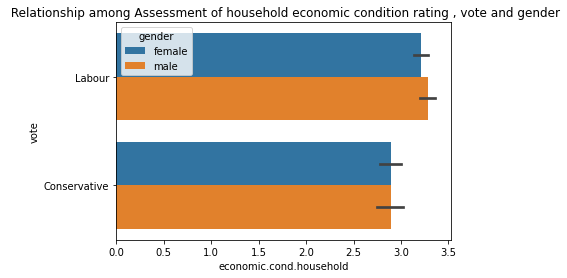

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(x=df['economic.cond.household'],y=df['vote'],hue=df['gender']);
plt.title(' Relationship among Assessment of household economic condition rating , vote and gender');

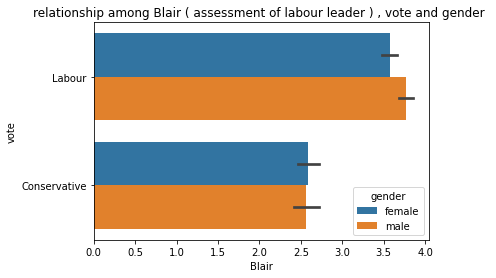

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(x=df['Blair'],y=df['vote'],hue=df['gender']);
plt.title('relationship among Blair ( assessment of labour leader ) , vote and gender ');

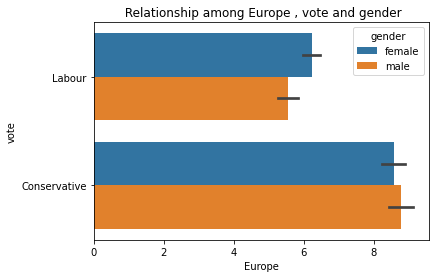

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(x=df['Europe'],y=df['vote'],hue=df['gender']);
plt.title(' Relationship among Europe , vote and gender');

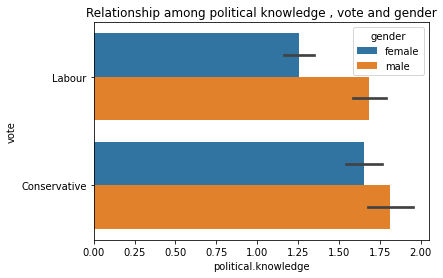

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
sns.barplot(x=df['political.knowledge'],y=df['vote'],hue=df['gender'])
plt.title('Relationship among political knowledge , vote and gender');

Data Preparation: 4 marks
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

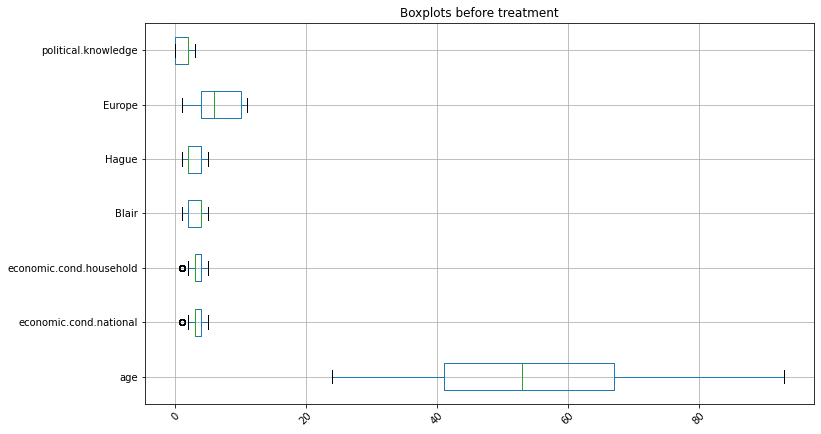

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
plt.figure(figsize=(12,7))
df.select_dtypes(include=['int64']).boxplot(vert=0)
plt.xticks(rotation=45);
plt.title('Boxplots before treatment');

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()

df=pd.get_dummies(df,drop_first=True)
df.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  vote_Labour  gender_male  
0                    2            1            0  
1                    2            1            1  
2                    2            1            1  
3                    0            1            0  
4                    2            1            1

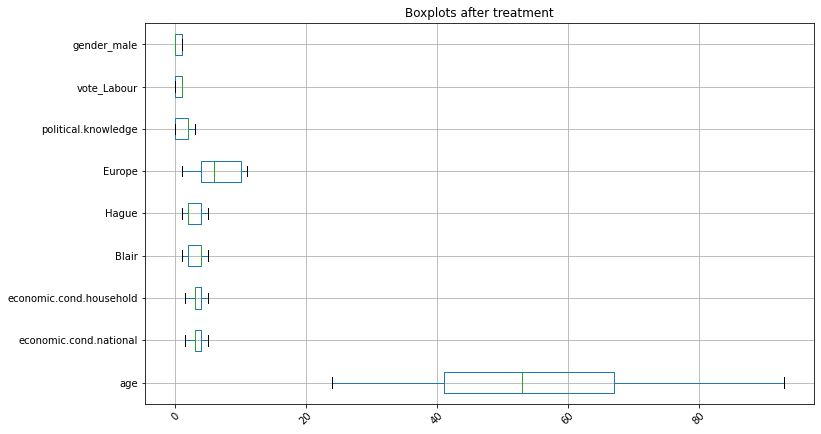

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
    
plt.figure(figsize=(12,7))
df.boxplot(vert=0)
plt.xticks(rotation=45);
plt.title('Boxplots after treatment');

Training data feature shape (1061, 8)
Testing data feature shape (456, 8)


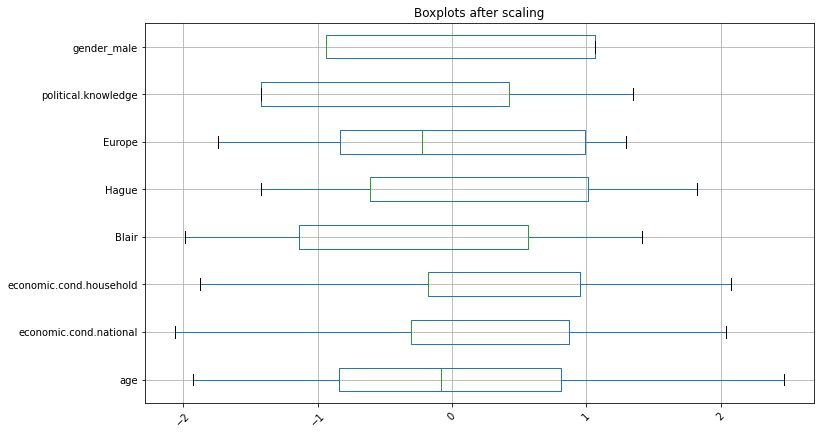

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
    
from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)
print('Training data feature shape',x_train.shape)
print('Testing data feature shape',x_test.shape)


x_s=x.apply(zscore)
plt.figure(figsize=(12,7))
x_s.boxplot(vert=0)
plt.xticks(rotation=45);
plt.title('Boxplots after scaling');

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)
print('Training data feature shape',x_train.shape)
print('Testing data feature shape',x_test.shape)



Training data feature shape (1061, 8)
Testing data feature shape (456, 8)


1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

**a)Logistic Regression**

**Logistic regression is a linear model for classification rather than regression. It is also known as logit regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.**

**Note: Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability. No regularization amounts to setting C to a very high value.**



<p>source: <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">scikit-learn</a></p>

Train set score 0.8341187558906692


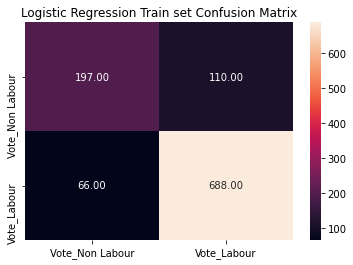

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Test set score 0.8289473684210527
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



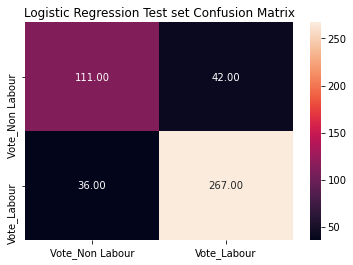

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_logit = LogisticRegression(max_iter=1000,random_state=1)
model_logit.fit(x_train, y_train)
y_predict_train=model_logit.predict(x_train)
model_score_train = model_logit.score(x_train , y_train)
print('Train set score',model_score_train)
sns.heatmap(metrics.confusion_matrix(y_train,y_predict_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Logistic Regression Train set Confusion Matrix')
plt.show()
print(metrics.classification_report(y_train,y_predict_train))
y_predict = model_logit.predict(x_test)
model_score = model_logit.score(x_test, y_test)
print('Test set score',model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_predict),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Logistic Regression Test set Confusion Matrix')
print(metrics.classification_report(y_test,y_predict))

In [47]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model_logit.coef_[0][idx]))

The coefficient for age is -0.2358109378049751
The coefficient for economic.cond.national is 0.569891885542121
The coefficient for economic.cond.household is 0.073880088083637
The coefficient for Blair is 0.7011949614260704
The coefficient for Hague is -1.0133856660529683
The coefficient for Europe is -0.6933767963723211
The coefficient for political.knowledge is -0.34364846728031057
The coefficient for gender_male is 0.09857741238441092


In [49]:
# Let us check the intercept for the model

intercept = model_logit.intercept_[0]

print("The intercept for Logistic Regression model is {}".format(intercept))

The intercept for Logistic Regression model is 1.4186334787064059


Feature: 0, Score: -0.23581
Feature: 1, Score: 0.56989
Feature: 2, Score: 0.07388
Feature: 3, Score: 0.70119
Feature: 4, Score: -1.01339
Feature: 5, Score: -0.69338
Feature: 6, Score: -0.34365
Feature: 7, Score: 0.09858


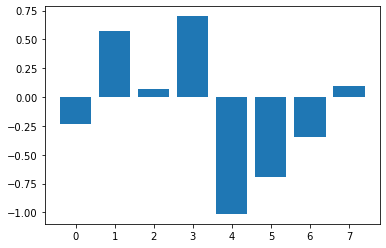

In [53]:
importance = model_logit.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

b)**LDA**

**LDA can be derived from simple probabilistic models which model the class conditional distribution of the data  $P(X|y=k)$ for each class $k$.Predictions can then be obtained by using Bayes’ rule:**

$P(y=k | X) = \frac{P(X | y=k) P(y=k)}{P(X)} = \frac{P(X | y=k) P(y = k)}{ \sum_{l} P(X | y=l) \cdot P(y=l)}$
 
**and we select the class $k$ which maximizes this conditional probability.**

**More specifically, for linear discriminant analysis, $P(X|y)$ is modeled as a multivariate Gaussian distribution with density:**

$P(X | y=k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}}\exp\left(-\frac{1}{2} (X-\mu_k)^t \Sigma_k^{-1} (X-\mu_k)\right)$
 
**where $d$ is the number of features.**

<p>source: <a href="https://scikit-learn.org/stable/modules/lda_qda.html#mathematical-formulation-of-the-lda-and-qda-classifiers">scikit-learn</a></p>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)

LinearDiscriminantAnalysis()

Train set LDA score 0.8341187558906692
Test set LDA score 0.831140350877193


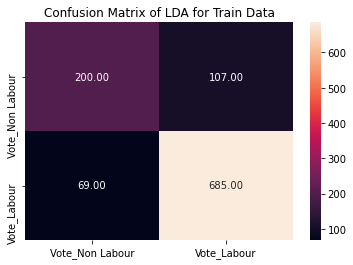

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



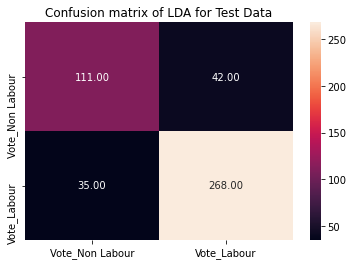

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)
y_pred_train=clfLDA.predict(x_train)
y_pred=clfLDA.predict(x_test)
model_scoreLDA_train = clfLDA.score(x_train,y_train)
model_scoreLDA = clfLDA.score(x_test, y_test)
print('Train set LDA score',model_scoreLDA_train)
print('Test set LDA score',model_scoreLDA)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Confusion Matrix of LDA for Train Data')
plt.show()

print(metrics.classification_report(y_train,y_pred_train))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Confusion matrix of LDA for Test Data')
plt.show()
print(metrics.classification_report(y_test,y_pred))

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

###  a) KNN

**Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. 
Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.**


<p>source: <a href="https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification">scikit-learn</a></p>

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train, y_train)


KNeighborsClassifier()

Train set KNN score 0.8567389255419415
Test set KNN score 0.8267543859649122


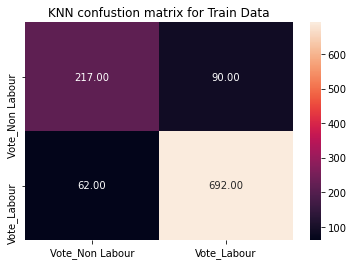

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



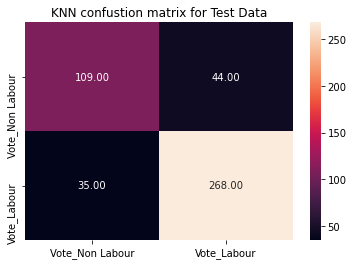

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train, y_train)
y_pred_train=clfKNN.predict(x_train)
y_pred=clfKNN.predict(x_test)
model_scoreKNN_train = clfKNN.score(x_train,y_train)
model_scoreKNN = clfKNN.score(x_test, y_test)
print('Train set KNN score',model_scoreKNN_train)
print('Test set KNN score',model_scoreKNN)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('KNN confustion matrix for Train Data')
plt.show()
print(metrics.classification_report(y_train,y_pred_train))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
print(metrics.classification_report(y_test,y_pred))
plt.title('KNN confustion matrix for Test Data')
plt.show()

#### B) Naive Bayes Classifier

**Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable y and dependent feature vector $x_1$ through $x_n$**

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$

#### Advantages:

**In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.**

**Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.**

**GaussianNB implements the Gaussian Naive Bayes algorithm for classification**

<p>source: <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">scikit-learn</a></p>

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

Train set Naive bayes score 0.8341187558906692
Test set Naive bayes score 0.8223684210526315


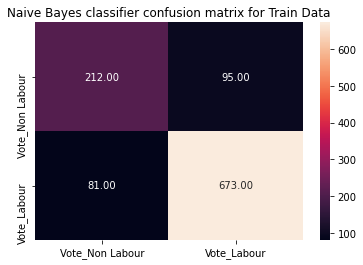

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



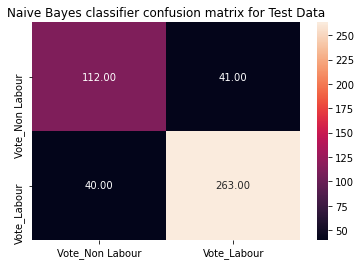

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model = GaussianNB()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)
y_pred=model.predict(x_test)
model_score_train = model.score(x_train,y_train)
model_score = model.score(x_test, y_test)
print('Train set Naive bayes score',model_score_train)
print('Test set Naive bayes score',model_score)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Naive Bayes classifier confusion matrix for Train Data')
plt.show()
print(metrics.classification_report(y_train,y_pred_train))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Naive Bayes classifier confusion matrix for Test Data')
plt.show()
print(metrics.classification_report(y_test,y_pred))

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [24]:
# a) GridsearchCV for Logistic Regression

In [66]:
from sklearn.model_selection import GridSearchCV

grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','liblinear'],
      'tol':[0.0001,0.00001],
     'C': [0.001,0.01,0.1,1,10,100,1000,10000,10000]}

model = LogisticRegression(max_iter=10000,n_jobs=1,random_state=1)

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(x_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

best_model = grid_search.best_estimator_

# Prediction on the training set

ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict)
print(metrics.classification_report(y_train, ytrain_predict),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict)
print(metrics.classification_report(y_test, ytest_predict),'\n');

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(C=0.1, max_iter=10000, n_jobs=1, penalty='l1',
                   random_state=1, solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70       307
         1.0       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise ValueError("pe

In [ ]:
# Gridsearch CV in Linear Descriminant Analysis

In [67]:
from sklearn.model_selection import GridSearchCV

grid1={'solver':['lsqr', 'eigen'], #note svd does not run with shrinkage and models using it will be tuned separately
      'tol':[0.0001,0.00001],
     'shrinkage':['auto','float',None]}
# grid2={'solver':['svd', 'lsqr', 'eigen'], #note svd does not run with shrinkage and models using it will be tuned separately
#       'tol':[0.0001,0.00001],
#      'shrinkage':['auto',None]}

model_LDA = LinearDiscriminantAnalysis()

grid_search1 = GridSearchCV(estimator = model_LDA, param_grid = grid1, cv = 5)
grid_search1.fit(x_train, y_train)

print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

best_model1 = grid_search1.best_estimator_

# Prediction on the training set

ytrain_predict1 = best_model1.predict(x_train)
ytest_predict1 = best_model1.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_prob1=best_model1.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob1).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict1)
print(metrics.classification_report(y_train, ytrain_predict1),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict1)
print(metrics.classification_report(y_test, ytest_predict1),'\n');

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       153
         1.0       0.87      0.88      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 592, in fit
    self._solve_lsqr(
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 378, in _solve_lsqr
    self.covariance_ = _class_cov(
  File "C:\Users\Admin\anaconda3\lib\si

In [ ]:
# Grid search CV in KNN

In [68]:
from sklearn.model_selection import GridSearchCV

grid_KNN={'n_neighbors':range(1,50),
      'weights':['uniform', 'distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
      }
model_KNN_gs=KNeighborsClassifier()


grid_search = GridSearchCV(estimator = model_KNN_gs, param_grid = grid_KNN, cv = 5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

best_model = grid_search.best_estimator_

# Prediction on the training set

ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict)
print(metrics.classification_report(y_train, ytrain_predict),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict)
print(metrics.classification_report(y_test, ytest_predict),'\n');

{'algorithm': 'auto', 'n_neighbors': 36, 'weights': 'distance'} 

KNeighborsClassifier(n_neighbors=36, weights='distance')
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72       153
         1.0       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456
 



In [ ]:
# Grid search CV in Naive Bayes Classifier

In [69]:
from sklearn.model_selection import GridSearchCV

grid_naive={'var_smoothing':[0,1e-9,1e-7, 1e-5,1e-1,1e-2]}

model_naive = GaussianNB()

grid_search = GridSearchCV(estimator = model_naive, param_grid = grid_naive, cv = 5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

best_model = grid_search.best_estimator_

# Prediction on the training set

ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict)
print(metrics.classification_report(y_train, ytrain_predict),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict)
print(metrics.classification_report(y_test, ytest_predict),'\n');

{'var_smoothing': 0} 

GaussianNB(var_smoothing=0)
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



## Bagging Classifier
**A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.**

In [89]:
from sklearn.ensemble import BaggingClassifier
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

bgcl = BaggingClassifier(base_estimator=clfRF,n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.9651272384542884
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       307
         1.0       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.96      1061



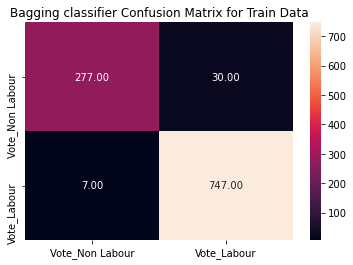

0.831140350877193


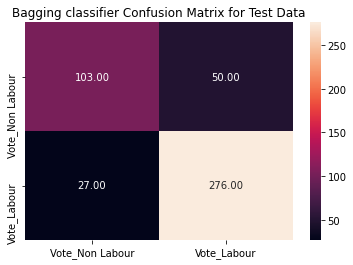

              precision    recall  f1-score   support

         0.0       0.79      0.67      0.73       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456

bag_train_precision_Labour  0.9
bag_train_recall_Labour  0.94
bag_train_f1_Labour  0.92
bag_train_precision_Conservative  0.83
bag_train_recall_Conservative  0.74
bag_train_f1_Conservative  0.78
bag_test_precision_Labour  0.85
bag_test_recall_Labour  0.91
bag_test_f1_Labour  0.88
bag_test_precision_Conservative  0.79
bag_test_recall_Conservative  0.67
bag_test_f1_Conservative  0.73
AUC: 0.997


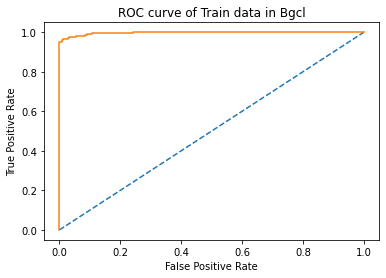

AUC: 0.895


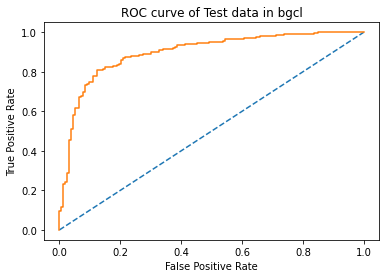

In [156]:
y_predict_train_Bagg=bgcl.predict(x_train)
print(bgcl.score(x_train,y_train))
bgcl_train_acc=round(bgcl.score(x_train,y_train),2)
sns.heatmap(metrics.confusion_matrix(y_train,y_predict_train_Bagg),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
print(metrics.classification_report(y_train,y_predict_train_Bagg))
plt.title('Bagging classifier Confusion Matrix for Train Data')
plt.show()
y_predict_bgcl = bgcl.predict(x_test)
print(bgcl.score(x_test , y_test))
bgcl_test_acc=round(bgcl.score(x_test,y_test),2)
sns.heatmap(metrics.confusion_matrix(y_test, y_predict_bgcl),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Bagging classifier Confusion Matrix for Test Data')
plt.show()
print(metrics.classification_report(y_test,y_predict_bgcl))

bag_metrics_train=classification_report(y_train, y_predict_train,output_dict=True)
bag_train=pd.DataFrame(bag_metrics_train).transpose()
bag_train

bag_train_precision_Labour=round(bag_train.loc['1.0'][0],2)
bag_train_recall_Labour=round(bag_train.loc['1.0'][1],2)
bag_train_f1_Labour=round(bag_train.loc['1.0'][2],2)

print ('bag_train_precision_Labour ',bag_train_precision_Labour)
print ('bag_train_recall_Labour ',bag_train_recall_Labour)
print ('bag_train_f1_Labour ',bag_train_f1_Labour)

bag_train_precision_Conservative=round(bag_train.loc['0.0'][0],2)
bag_train_recall_Conservative=round(bag_train.loc['0.0'][1],2)
bag_train_f1_Conservative=round(bag_train.loc['0.0'][2],2)

print ('bag_train_precision_Conservative ',bag_train_precision_Conservative)
print ('bag_train_recall_Conservative ',bag_train_recall_Conservative)
print ('bag_train_f1_Conservative ',bag_train_f1_Conservative)

bag_metrics_test=classification_report(y_test, y_predict,output_dict=True)
bag_test=pd.DataFrame(bag_metrics_test).transpose()

bag_test_precision_Labour=round(bag_test.loc['1.0'][0],2)
bag_test_recall_Labour=round(bag_test.loc['1.0'][1],2)
bag_test_f1_Labour=round(bag_test.loc['1.0'][2],2)
print ('bag_test_precision_Labour ',bag_test_precision_Labour)
print ('bag_test_recall_Labour ',bag_test_recall_Labour)
print ('bag_test_f1_Labour ',bag_test_f1_Labour)

bag_test_precision_Conservative=round(bag_test.loc['0.0'][0],2)
bag_test_recall_Conservative=round(bag_test.loc['0.0'][1],2)
bag_test_f1_Conservative=round(bag_test.loc['0.0'][2],2)
print ('bag_test_precision_Conservative ',bag_test_precision_Conservative)
print ('bag_test_recall_Conservative ',bag_test_recall_Conservative)
print ('bag_test_f1_Conservative ',bag_test_f1_Conservative)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = bgcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bgcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bgcl_train_auc)
# calculate roc curve
bgcl_train_fpr, bgcl_train_tpr, bgcl_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(bgcl_train_fpr, bgcl_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in Bgcl');
plt.show()

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = bgcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bgcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bgcl_test_auc)
# calculate roc curve
bgcl_test_fpr, bgcl_test_tpr, bgcl_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(bgcl_test_fpr, bgcl_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in bgcl');
plt.show()

 Model score for Train Data 1.0
Model score for Test Data 0.831140350877193


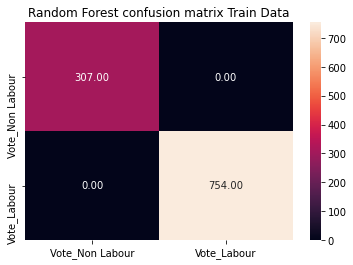

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



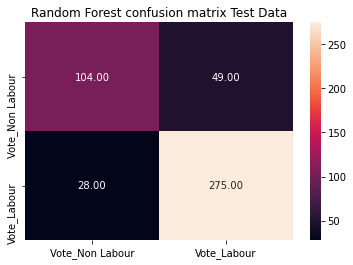

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [92]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(x_train,y_train)
y_pred_train=clfRF.predict(x_train)
y_pred=clfRF.predict(x_test)
model_scoreRF = clfRF.score(x_test, y_test)
model_scoreRF_train=clfRF.score(x_train,y_train)
print(' Model score for Train Data',model_scoreRF_train)
print('Model score for Test Data',model_scoreRF)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Random Forest confusion matrix Train Data')
plt.show()
print(metrics.classification_report(y_train,y_pred_train))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Random Forest confusion matrix Test Data')
plt.show()

print(metrics.classification_report(y_test,y_pred))

{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 90}
RandomForestClassifier(max_depth=6, max_features=7, min_samples_leaf=20,
                       min_samples_split=50, n_estimators=90, random_state=1)


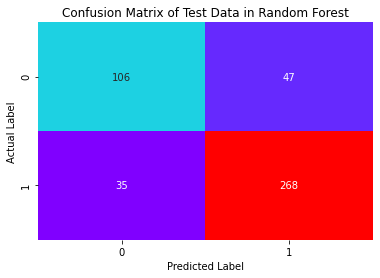

Confustion Matrix of Test data in Random Forest
 [[106  47]
 [ 35 268]]


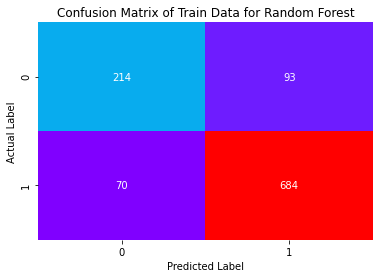

Confustion Matrix of Train data in Random Forest
 [[214  93]
 [ 70 684]]
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       307
         1.0       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72       153
         1.0       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456

                              Imp
Hague                    0.375130
Blair                    0.265913
Europe                   0.181557
economic.cond.national   0.058952
political.knowledge      0.058657
age                      0.044483
economic.cond.household  0.010965
g

In [82]:
param_grid_RF = {
    'max_depth': [6,7, 8],
    'max_features': [6,7,8],
    'min_samples_leaf': [15,20, 25],
    'min_samples_split': [50,60, 75],
    'n_estimators': [90,101, 301]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search2 = GridSearchCV(estimator = rfcl, param_grid = param_grid_RF, cv = 3)
grid_search2.fit(x_train,y_train)
print(grid_search2.best_params_)
best_grid2 = grid_search2.best_estimator_

print(best_grid2)
ytrain_predict2 = best_grid2.predict(x_train)
ytest_predict2 = best_grid2.predict(x_test)

metrics.confusion_matrix(y_test,ytest_predict2)
sns.heatmap(metrics.confusion_matrix(y_test,ytest_predict2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data in Random Forest')
plt.show()

print('Confustion Matrix of Test data in Random Forest\n',metrics.confusion_matrix(y_test,ytest_predict2))

metrics.confusion_matrix(y_train,ytrain_predict2)
sns.heatmap(metrics.confusion_matrix(y_train,ytrain_predict2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data for Random Forest')
plt.show()

print('Confustion Matrix of Train data in Random Forest\n',metrics.confusion_matrix(y_train,ytrain_predict2))

print(metrics.classification_report(y_train,ytrain_predict2))

print(metrics.classification_report(y_test,ytest_predict2))

print (pd.DataFrame(best_grid2.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))



AUC: 0.909


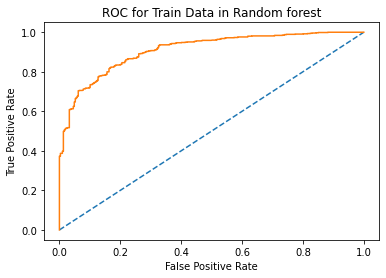

AUC: 0.889


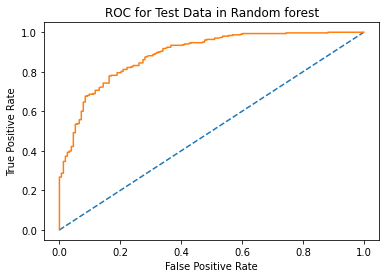

rf_train_precision  0.88
rf_train_recall  0.91
rf_train_f1  0.89
rf_test_precision  0.85
rf_test_recall  0.88
rf_test_f1  0.87


In [81]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_grid2.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--');
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC for Train Data in Random forest');
plt.show()

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_grid2.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--');
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC for Test Data in Random forest');
plt.show()

rf_metrics=classification_report(y_train, ytrain_predict2,output_dict=True)
rf=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(rf.loc["1.0"][0],2)
rf_train_recall=round(rf.loc["1.0"][1],2)
rf_train_f1=round(rf.loc["1.0"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_metrics=classification_report(y_test, ytest_predict2,output_dict=True)
rf=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(rf.loc["1.0"][0],2)
rf_test_recall=round(rf.loc["1.0"][1],2)
rf_test_f1=round(rf.loc["1.0"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

### Ensemble: Boosting

**The module sklearn.ensemble includes the popular boosting algorithm AdaBoost, introduced in 1995 by Freund and Schapire**

**The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.**

**The number of weak learners is controlled by the parameter n_estimators. The learning_rate parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split).**

<p>source: <a href="https://scikit-learn.org/stable/modules/ensemble.html#adaboost">scikit-learn</a></p>

1.0


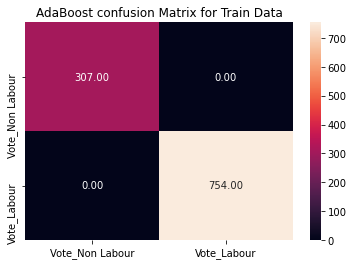

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

0.8223684210526315


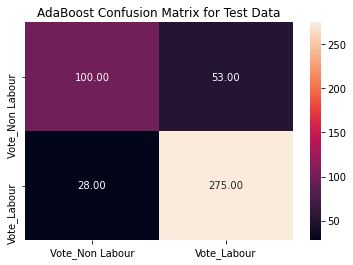

              precision    recall  f1-score   support

         0.0       0.78      0.65      0.71       153
         1.0       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456

Ada_train_precision_Labour  1.0
Ada_train_recall_Labour  1.0
Ada_train_f1_Labour  1.0
Ada_train_precision_Conservative  1.0
Ada_train_recall_Conservative  1.0
Ada_train_f1_Conservative  1.0
Ada_test_precision_Labour  0.84
Ada_test_recall_Labour  0.91
Ada_test_f1_Labour  0.87
Ada_test_precision_Conservative  0.78
Ada_test_recall_Conservative  0.65
Ada_test_f1_Conservative  0.71
AUC: 1.000


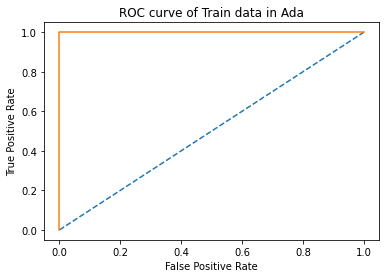

AUC: 0.887


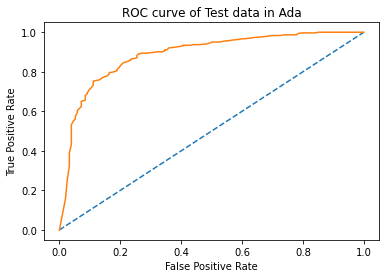

In [157]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(base_estimator=clfRF,n_estimators=100,random_state=1)
clfADB.fit(x_train,y_train)
y_pred_train=clfADB.predict(x_train)
y_pred=clfADB.predict(x_test)
model_scoreADB_train=clfADB.score(x_train,y_train)
print(model_scoreADB_train)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('AdaBoost confusion Matrix for Train Data')
plt.show()
print(metrics.classification_report(y_train,y_pred_train))
model_scoreADB = clfADB.score(x_test, y_test)
print(model_scoreADB)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('AdaBoost Confusion Matrix for Test Data')
plt.show()
print(metrics.classification_report(y_test,y_pred))

Ada_metrics_train=classification_report(y_train, y_pred_train,output_dict=True)
Ada_train=pd.DataFrame(Ada_metrics_train).transpose()
Ada_train

Ada_train_precision_Labour=round(Ada_train.loc['1.0'][0],2)
Ada_train_recall_Labour=round(Ada_train.loc['1.0'][1],2)
Ada_train_f1_Labour=round(Ada_train.loc['1.0'][2],2)

print ('Ada_train_precision_Labour ',Ada_train_precision_Labour)
print ('Ada_train_recall_Labour ',Ada_train_recall_Labour)
print ('Ada_train_f1_Labour ',Ada_train_f1_Labour)

Ada_train_precision_Conservative=round(Ada_train.loc['0.0'][0],2)
Ada_train_recall_Conservative=round(Ada_train.loc['0.0'][1],2)
Ada_train_f1_Conservative=round(Ada_train.loc['0.0'][2],2)

print ('Ada_train_precision_Conservative ',Ada_train_precision_Conservative)
print ('Ada_train_recall_Conservative ',Ada_train_recall_Conservative)
print ('Ada_train_f1_Conservative ',Ada_train_f1_Conservative)

Ada_metrics_test=classification_report(y_test, y_pred,output_dict=True)
Ada_test=pd.DataFrame(Ada_metrics_test).transpose()

Ada_test_precision_Labour=round(Ada_test.loc['1.0'][0],2)
Ada_test_recall_Labour=round(Ada_test.loc['1.0'][1],2)
Ada_test_f1_Labour=round(Ada_test.loc['1.0'][2],2)
print ('Ada_test_precision_Labour ',Ada_test_precision_Labour)
print ('Ada_test_recall_Labour ',Ada_test_recall_Labour)
print ('Ada_test_f1_Labour ',Ada_test_f1_Labour)

Ada_test_precision_Conservative=round(Ada_test.loc['0.0'][0],2)
Ada_test_recall_Conservative=round(Ada_test.loc['0.0'][1],2)
Ada_test_f1_Conservative=round(Ada_test.loc['0.0'][2],2)
print ('Ada_test_precision_Conservative ',Ada_test_precision_Conservative)
print ('Ada_test_recall_Conservative ',Ada_test_recall_Conservative)
print ('Ada_test_f1_Conservative ',Ada_test_f1_Conservative)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = clfADB.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % Ada_train_auc)
# calculate roc curve
Ada_train_fpr, Ada_train_tpr, Ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(Ada_train_fpr, Ada_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in Ada');
plt.show()

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = clfADB.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Ada_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % Ada_test_auc)
# calculate roc curve
Ada_test_fpr, Ada_test_tpr, Ada_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(Ada_test_fpr, Ada_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in Ada');
plt.show()

## Gradient Boosting
**Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.**

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.8803016022620169


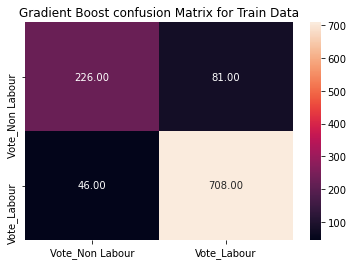

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78       307
         1.0       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061

0.8289473684210527


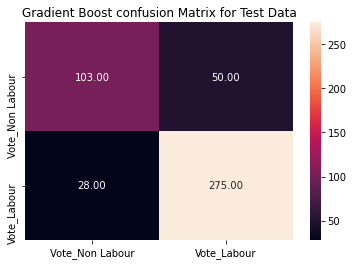

              precision    recall  f1-score   support

         0.0       0.79      0.67      0.73       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456

Grad_train_precision_Labour  0.9
Grad_train_recall_Labour  0.94
Grad_train_f1_Labour  0.92
Grad_train_precision_Conservative  0.83
Grad_train_recall_Conservative  0.74
Grad_train_f1_Conservative  0.78
Grad_test_precision_Labour  0.85
Grad_test_recall_Labour  0.91
Grad_test_f1_Labour  0.88
Grad_test_precision_Conservative  0.79
Grad_test_recall_Conservative  0.67
Grad_test_f1_Conservative  0.73
AUC: 0.935


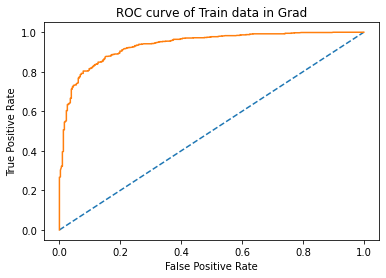

AUC: 0.897


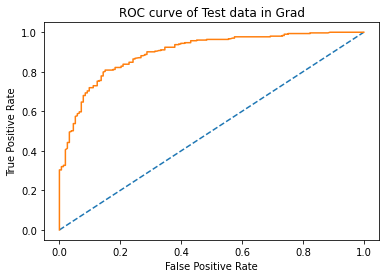

In [158]:
y_predict_train = gbcl.predict(x_train)
print(gbcl.score(x_train,y_train))
sns.heatmap(metrics.confusion_matrix(y_train,y_predict_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Gradient Boost confusion Matrix for Train Data')
plt.show()
print(metrics.classification_report(y_train,y_predict_train))
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
sns.heatmap(metrics.confusion_matrix(y_test, y_predict),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Gradient Boost confusion Matrix for Test Data')
plt.show()
print(metrics.classification_report(y_test,y_predict))

Grad_metrics_train=classification_report(y_train, y_predict_train,output_dict=True)
Grad_train=pd.DataFrame(Grad_metrics_train).transpose()
Grad_train

Grad_train_precision_Labour=round(Grad_train.loc['1.0'][0],2)
Grad_train_recall_Labour=round(Grad_train.loc['1.0'][1],2)
Grad_train_f1_Labour=round(Grad_train.loc['1.0'][2],2)

print ('Grad_train_precision_Labour ',Grad_train_precision_Labour)
print ('Grad_train_recall_Labour ',Grad_train_recall_Labour)
print ('Grad_train_f1_Labour ',Grad_train_f1_Labour)

Grad_train_precision_Conservative=round(Grad_train.loc['0.0'][0],2)
Grad_train_recall_Conservative=round(Grad_train.loc['0.0'][1],2)
Grad_train_f1_Conservative=round(Grad_train.loc['0.0'][2],2)

print ('Grad_train_precision_Conservative ',Grad_train_precision_Conservative)
print ('Grad_train_recall_Conservative ',Grad_train_recall_Conservative)
print ('Grad_train_f1_Conservative ',Grad_train_f1_Conservative)

Grad_metrics_test=classification_report(y_test, y_predict,output_dict=True)
Grad_test=pd.DataFrame(Grad_metrics_test).transpose()

Grad_test_precision_Labour=round(Grad_test.loc['1.0'][0],2)
Grad_test_recall_Labour=round(Grad_test.loc['1.0'][1],2)
Grad_test_f1_Labour=round(Grad_test.loc['1.0'][2],2)
print ('Grad_test_precision_Labour ',Grad_test_precision_Labour)
print ('Grad_test_recall_Labour ',Grad_test_recall_Labour)
print ('Grad_test_f1_Labour ',Grad_test_f1_Labour)

Grad_test_precision_Conservative=round(Grad_test.loc['0.0'][0],2)
Grad_test_recall_Conservative=round(Grad_test.loc['0.0'][1],2)
Grad_test_f1_Conservative=round(Grad_test.loc['0.0'][2],2)
print ('Grad_test_precision_Conservative ',Grad_test_precision_Conservative)
print ('Grad_test_recall_Conservative ',Grad_test_recall_Conservative)
print ('Grad_test_f1_Conservative ',Grad_test_f1_Conservative)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Grad_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % Grad_train_auc)
# calculate roc curve
Grad_train_fpr, Grad_train_tpr, Grad_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(Grad_train_fpr, Grad_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in Grad');
plt.show()

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Grad_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % Grad_test_auc)
# calculate roc curve
Grad_test_fpr, Grad_test_tpr, Grad_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(Grad_test_fpr, Grad_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in Grad');
plt.show()

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

Train set score 0.8341187558906692


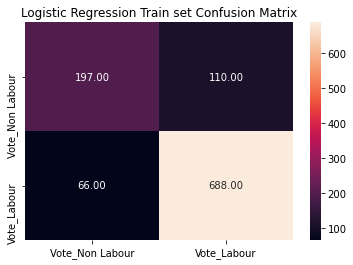

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Test set score 0.8289473684210527
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

logit_train_precision_Labour  0.86
logit_train_recall_Labour  0.91
logit_train_f1_Labour  0.89
logit_train_precision_Conservative  0.75
logit_train_recall_Conservative  0.64
logit_train_f1_Conservative  0.69
logit_test_precision_Labour  0.86
logit_test_recall_Labour  0.88
logit_test_f1_Labour  0.87
logit_test_p

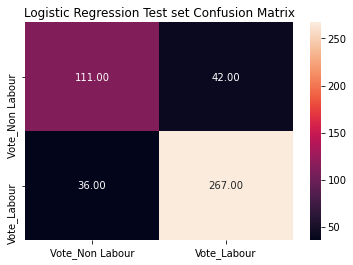

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_logit = LogisticRegression(max_iter=1000,random_state=1)
model_logit.fit(x_train, y_train)
y_predict_train=model_logit.predict(x_train)
model_score_train = model_logit.score(x_train , y_train)
print('Train set score',model_score_train)
sns.heatmap(metrics.confusion_matrix(y_train,y_predict_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Logistic Regression Train set Confusion Matrix')
plt.show()
print(metrics.classification_report(y_train,y_predict_train))
y_predict = model_logit.predict(x_test)
model_score = model_logit.score(x_test, y_test)
print('Test set score',model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_predict),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Logistic Regression Test set Confusion Matrix')
print(metrics.classification_report(y_test,y_predict))

logit_metrics_train=classification_report(y_train, y_predict_train,output_dict=True)
logit_train=pd.DataFrame(logit_metrics_train).transpose()
logit_train

logit_train_precision_Labour=round(logit_train.loc['1.0'][0],2)
logit_train_recall_Labour=round(logit_train.loc['1.0'][1],2)
logit_train_f1_Labour=round(logit_train.loc['1.0'][2],2)

print ('logit_train_precision_Labour ',logit_train_precision_Labour)
print ('logit_train_recall_Labour ',logit_train_recall_Labour)
print ('logit_train_f1_Labour ',logit_train_f1_Labour)

logit_train_precision_Conservative=round(logit_train.loc['0.0'][0],2)
logit_train_recall_Conservative=round(logit_train.loc['0.0'][1],2)
logit_train_f1_Conservative=round(logit_train.loc['0.0'][2],2)

print ('logit_train_precision_Conservative ',logit_train_precision_Conservative)
print ('logit_train_recall_Conservative ',logit_train_recall_Conservative)
print ('logit_train_f1_Conservative ',logit_train_f1_Conservative)

logit_metrics_test=classification_report(y_test, y_predict,output_dict=True)
logit_test=pd.DataFrame(logit_metrics_test).transpose()

logit_test_precision_Labour=round(logit_test.loc['1.0'][0],2)
logit_test_recall_Labour=round(logit_test.loc['1.0'][1],2)
logit_test_f1_Labour=round(logit_test.loc['1.0'][2],2)
print ('logit_test_precision_Labour ',logit_test_precision_Labour)
print ('logit_test_recall_Labour ',logit_test_recall_Labour)
print ('logit_test_f1_Labour ',logit_test_f1_Labour)

logit_test_precision_Conservative=round(logit_test.loc['0.0'][0],2)
logit_test_recall_Conservative=round(logit_test.loc['0.0'][1],2)
logit_test_f1_Conservative=round(logit_test.loc['0.0'][2],2)
print ('logit_test_precision_Conservative ',logit_test_precision_Conservative)
print ('logit_test_recall_Conservative ',logit_test_recall_Conservative)
print ('logit_test_f1_Conservative ',logit_test_f1_Conservative)

In [109]:
from sklearn.model_selection import GridSearchCV

grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','liblinear'],
      'tol':[0.0001,0.00001],
     'C': [0.001,0.01,0.1,1,10,100,1000,10000,10000]}

model_logit_gs = LogisticRegression(max_iter=10000,n_jobs=1,random_state=1)

grid_search_logit = GridSearchCV(estimator = model_logit_gs, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search_logit.fit(x_train, y_train)

print(grid_search_logit.best_params_,'\n')
print(grid_search_logit.best_estimator_)

best_model_logit = grid_search_logit.best_estimator_

# Prediction on the training set

ytrain_predict_logit = best_model_logit.predict(x_train)
ytest_predict_logit = best_model_logit.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_prob_logit=best_model_logit.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_logit).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict_logit)
print(metrics.classification_report(y_train, ytrain_predict_logit),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict_logit)
print(metrics.classification_report(y_test, ytest_predict_logit),'\n');

logit_metrics_train_gs=classification_report(y_train, ytrain_predict_logit,output_dict=True)
logit_train_gs=pd.DataFrame(logit_metrics_train_gs).transpose()
logit_train_gs
logit_train_precision_gs_Labour=round(logit_train_gs.loc['1.0'][0],2)
logit_train_recall_gs_Labour=round(logit_train_gs.loc['1.0'][1],2)
logit_train_f1_gs_Labour=round(logit_train_gs.loc['1.0'][2],2)
print ('logit_train_precision_Labour ',logit_train_precision_gs_Labour)
print ('logit_train_recall_Labour ',logit_train_recall_gs_Labour)
print ('logit_train_f1_Labour ',logit_train_f1_gs_Labour)

logit_train_precision_gs_Conservative=round(logit_train_gs.loc['0.0'][0],2)
logit_train_recall_gs_Conservative=round(logit_train_gs.loc['0.0'][1],2)
logit_train_f1_gs_Conservative=round(logit_train_gs.loc['0.0'][2],2)
print ('logit_train_precision_conservative ',logit_train_precision_gs_Conservative)
print ('logit_train_recall_conservative ',logit_train_recall_gs_Conservative)
print ('logit_train_f1_conservative ',logit_train_f1_gs_Conservative)

logit_metrics_test_gs=classification_report(y_test, y_predict,output_dict=True)
logit_test_gs=pd.DataFrame(logit_metrics_test_gs).transpose()

logit_test_precision_gs_Labour=round(logit_test_gs.loc['1.0'][0],2)
logit_test_recall_gs_Labour=round(logit_test_gs.loc['1.0'][1],2)
logit_test_f1_gs_Labour=round(logit_test_gs.loc['1.0'][2],2)
print ('logit_test_precision_gs_Labour ',logit_test_precision_gs_Labour)
print ('logit_test_recall_gs_Labour ',logit_test_recall_gs_Labour)
print ('logit_test_f1_gs_Labour ',logit_test_f1_gs_Labour)

logit_test_precision_gs_Conservative=round(logit_test_gs.loc['0.0'][0],2)
logit_test_recall_gs_Conservative=round(logit_test_gs.loc['0.0'][1],2)
logit_test_f1_gs_Conservative=round(logit_test_gs.loc['0.0'][2],2)
print ('logit_test_precision_gs ',logit_test_precision_gs_Conservative)
print ('logit_test_recall_gs ',logit_test_recall_gs_Conservative)
print ('logit_test_f1_gs ',logit_test_f1_gs_Conservative)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(C=0.1, max_iter=10000, n_jobs=1, penalty='l1',
                   random_state=1, solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70       307
         1.0       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 

logit_train_precision_Labour  0.86
logit_train_recall_Labour  0.92
logit_train_f1_Labour  0.89
logit_train_precision_conservative  0.77
logit_train_recal

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise ValueError("pe

AUC: 0.890


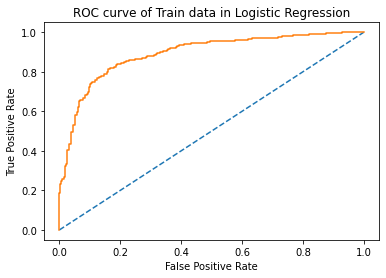

In [110]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_logit.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in Logistic Regression');

AUC: 0.883


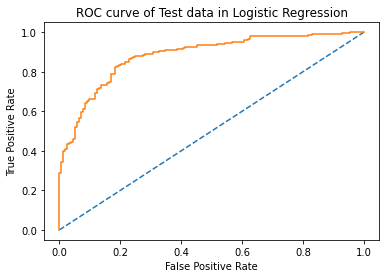

In [111]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_logit.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in Logistic Regression');

AUC: 0.890


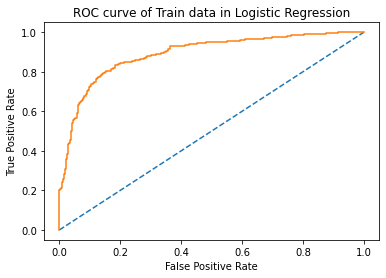

In [112]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_model_logit.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc_gs = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc_gs)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in Logistic Regression');

AUC: 0.883


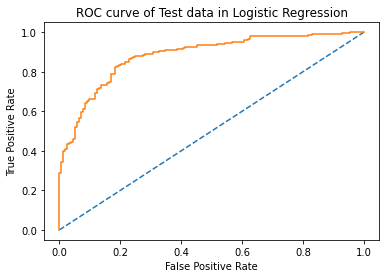

In [113]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_logit.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc_gs = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc_gs)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in Logistic Regression');

##### b) LDA

Train set LDA score 0.8341187558906692
Test set LDA score 0.831140350877193


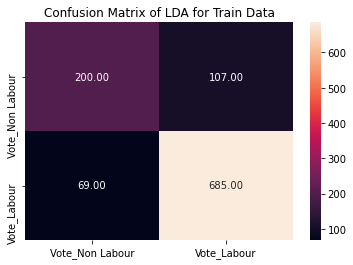

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



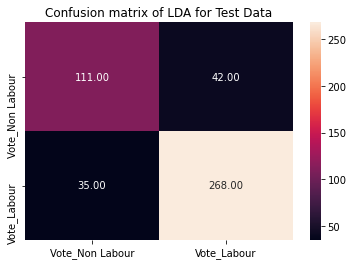

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

lda_train_precision_Labour  0.86
lda_train_recall_Labour  0.91
lda_train_f1_Labour  0.89
lda_train_precision_Conservative  0.86
lda_train_recall_Conservative  0.91
lda_train_f1_Conservative  0.89
lda_test_precision_Labour  0.86
lda_test_recall_Labour  0.88
lda_test_f1_Labour  0.87
lda_test_precision_Conservative  0.76
lda_test_recall_Conservative  0.73
lda_test_f1_Conservative  0.74


In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)
y_pred_train=clfLDA.predict(x_train)
y_pred=clfLDA.predict(x_test)
model_scoreLDA_train = clfLDA.score(x_train,y_train)
model_scoreLDA = clfLDA.score(x_test, y_test)
print('Train set LDA score',model_scoreLDA_train)
print('Test set LDA score',model_scoreLDA)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Confusion Matrix of LDA for Train Data')
plt.show()

print(metrics.classification_report(y_train,y_pred_train))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Confusion matrix of LDA for Test Data')
plt.show()
print(metrics.classification_report(y_test,y_pred))

lda_metrics_train=classification_report(y_train,y_pred_train,output_dict=True)
lda_train=pd.DataFrame(lda_metrics_train).transpose()
lda_train
lda_train_precision_Labour=round(lda_train.loc['1.0'][0],2)
lda_train_recall_Labour=round(lda_train.loc['1.0'][1],2)
lda_train_f1_Labour=round(lda_train.loc['1.0'][2],2)
print ('lda_train_precision_Labour ',lda_train_precision_Labour)
print ('lda_train_recall_Labour ',lda_train_recall_Labour)
print ('lda_train_f1_Labour ',lda_train_f1_Labour)

lda_train_precision_Conservative=round(lda_train.loc['0.0'][0],2)
lda_train_recall_Conservative=round(lda_train.loc['0.0'][1],2)
lda_train_f1_Conservative=round(lda_train.loc['0.0'][2],2)
print ('lda_train_precision_Conservative ',lda_train_precision_Labour)
print ('lda_train_recall_Conservative ',lda_train_recall_Labour)
print ('lda_train_f1_Conservative ',lda_train_f1_Labour)

lda_metrics_test=classification_report(y_test, y_pred,output_dict=True)
lda_test=pd.DataFrame(lda_metrics_test).transpose()

lda_test_precision_Labour=round(lda_test.loc['1.0'][0],2)
lda_test_recall_Labour=round(lda_test.loc['1.0'][1],2)
lda_test_f1_Labour=round(lda_test.loc['1.0'][2],2)
print ('lda_test_precision_Labour ',lda_test_precision_Labour)
print ('lda_test_recall_Labour ',lda_test_recall_Labour)
print ('lda_test_f1_Labour ',lda_test_f1_Labour)

lda_test_precision_Conservative=round(lda_test.loc['0.0'][0],2)
lda_test_recall_Conservative=round(lda_test.loc['0.0'][1],2)
lda_test_f1_Conservative=round(lda_test.loc['0.0'][2],2)
print ('lda_test_precision_Conservative ',lda_test_precision_Conservative)
print ('lda_test_recall_Conservative ',lda_test_recall_Conservative)
print ('lda_test_f1_Conservative ',lda_test_f1_Conservative)

In [117]:
from sklearn.model_selection import GridSearchCV

grid1={'solver':['lsqr', 'eigen'], #note svd does not run with shrinkage and models using it will be tuned separately
      'tol':[0.0001,0.00001],
     'shrinkage':['auto','float',None]}
# grid2={'solver':['svd', 'lsqr', 'eigen'], #note svd does not run with shrinkage and models using it will be tuned separately
#       'tol':[0.0001,0.00001],
#      'shrinkage':['auto',None]}

model_LDA = LinearDiscriminantAnalysis()

grid_search1 = GridSearchCV(estimator = model_LDA, param_grid = grid1, cv = 5)
grid_search1.fit(x_train, y_train)

print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

best_model1_lda_gs = grid_search1.best_estimator_

# Prediction on the training set

ytrain_predict1_lda_gs = best_model1_lda_gs.predict(x_train)
ytest_predict1_lda_gs = best_model1_lda_gs.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_prob1_lda_gs=best_model1_lda_gs.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob1_lda_gs).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict1_lda_gs)
print(metrics.classification_report(y_train, ytrain_predict1_lda_gs),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict1_lda_gs)
print(metrics.classification_report(y_test, ytest_predict1_lda_gs),'\n');

lda_metrics_train_gs=classification_report(y_train,  ytrain_predict1_lda_gs,output_dict=True)
lda_train_gs=pd.DataFrame(lda_metrics_train_gs).transpose()
lda_train_gs

lda_train_precision_gs_Labour=round(lda_train_gs.loc['1.0'][0],2)
lda_train_recall_gs_Labour=round(lda_train_gs.loc['1.0'][1],2)
lda_train_f1_gs_Labour=round(lda_train_gs.loc['1.0'][2],2)
print ('lda_train_precision_gs_Labour ',lda_train_precision_gs_Labour)
print ('lda_train_recall_gs_Labour ',lda_train_recall_gs_Labour)
print ('lda_train_f1_gs_Labour ',lda_train_f1_gs_Labour)

lda_train_precision_gs_Conservative=round(lda_train_gs.loc['0.0'][0],2)
lda_train_recall_gs_Conservative=round(lda_train_gs.loc['0.0'][1],2)
lda_train_f1_gs_Conservative=round(lda_train_gs.loc['0.0'][2],2)
print ('lda_train_precision_gs_Conservative ',lda_train_precision_gs_Conservative)
print ('lda_train_recall_gs_Conservative ',lda_train_recall_gs_Conservative)
print ('lda_train_f1_gs_Conservative ',lda_train_f1_gs_Conservative)

lda_metrics_test_gs=classification_report(y_test, y_predict,output_dict=True)
lda_test_gs=pd.DataFrame(lda_metrics_test_gs).transpose()

lda_test_precision_gs_Labour=round(lda_test_gs.loc['1.0'][0],2)
lda_test_recall_gs_Labour=round(lda_test_gs.loc['1.0'][1],2)
lda_test_f1_gs_Labour=round(lda_test_gs.loc['1.0'][2],2)
print ('lda_test_precision_gs ',lda_test_precision_gs_Labour)
print ('lda_test_recall_gs ',lda_test_recall_gs_Labour)
print ('lda_test_f1_gs ',lda_test_f1_gs_Labour)

lda_test_precision_gs_Conservative=round(lda_test_gs.loc['0.0'][0],2)
lda_test_recall_gs_Conservative=round(lda_test_gs.loc['0.0'][1],2)
lda_test_f1_gs_Conservative=round(lda_test_gs.loc['0.0'][2],2)
print ('lda_test_precision_gs ',lda_test_precision_gs_Conservative)
print ('lda_test_recall_gs ',lda_test_recall_gs_Conservative)
print ('lda_test_f1_gs ',lda_test_f1_gs_Conservative)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       153
         1.0       0.87      0.88      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 

lda_train_precision_gs_Labour  0.87
lda_train_recall_gs_Labour  0.9
lda_train_f1_gs_Labour  0.88
lda_train_precision_gs_Conservative  0.74
lda_train_recall_gs_Conservative  0.65
lda_train_f1_gs_Conservative  0.69
lda_test_pre

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 592, in fit
    self._solve_lsqr(
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 378, in _solve_lsqr
    self.covariance_ = _class_cov(
  File "C:\Users\Admin\anaconda3\lib\si

AUC: 0.890


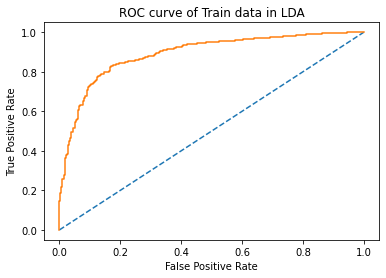

In [118]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = clfLDA.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in LDA');

AUC: 0.888


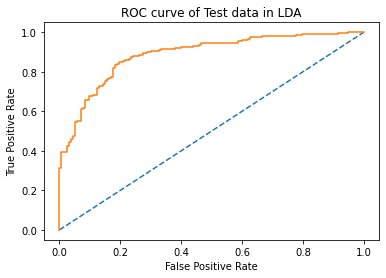

In [119]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = clfLDA.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in LDA');

AUC: 0.890


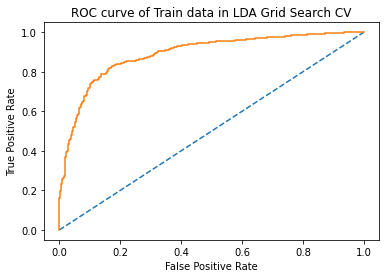

In [120]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_model1_lda_gs.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc_gs = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc_gs)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in LDA Grid Search CV');

AUC: 0.887


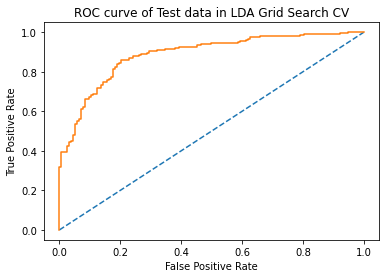

In [121]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_model1_lda_gs.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc_gs = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc_gs)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in LDA Grid Search CV');

#### c)KNN

Train set KNN score 0.8567389255419415
Test set KNN score 0.8267543859649122


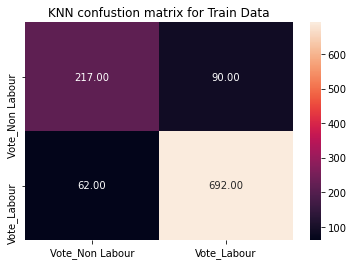

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



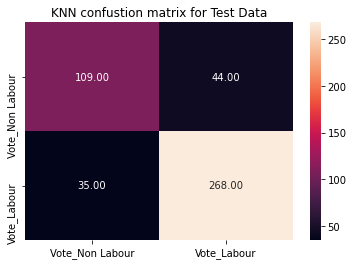

knn_train_precision_Labour  0.88
knn_train_recall_Labour  0.92
knn_train_f1_Labour  0.9
knn_train_precision_Conservative  0.78
knn_train_recall_Conservative  0.71
knn_train_f1_Conservative  0.74
knn_test_precision_Labour  0.86
knn_test_recall_Labour  0.88
knn_test_f1_Labour  0.87
knn_test_precision_Conservative  0.76
knn_test_recall_Conservative  0.71
knn_test_f1_Conservative  0.73


In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train, y_train)
y_pred_train=clfKNN.predict(x_train)
y_pred=clfKNN.predict(x_test)
model_scoreKNN_train = clfKNN.score(x_train,y_train)
model_scoreKNN = clfKNN.score(x_test, y_test)
print('Train set KNN score',model_scoreKNN_train)
print('Test set KNN score',model_scoreKNN)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('KNN confustion matrix for Train Data')
plt.show()
print(metrics.classification_report(y_train,y_pred_train))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
print(metrics.classification_report(y_test,y_pred))
plt.title('KNN confustion matrix for Test Data')
plt.show()

knn_metrics_train=classification_report(y_train, y_pred_train,output_dict=True)
knn_train=pd.DataFrame(knn_metrics_train).transpose()
knn_train
knn_train_precision_Labour=round(knn_train.loc['1.0'][0],2)
knn_train_recall_Labour=round(knn_train.loc['1.0'][1],2)
knn_train_f1_Labour=round(knn_train.loc['1.0'][2],2)
print ('knn_train_precision_Labour ',knn_train_precision_Labour)
print ('knn_train_recall_Labour ',knn_train_recall_Labour)
print ('knn_train_f1_Labour ',knn_train_f1_Labour)

knn_train_precision_Conservative=round(knn_train.loc['0.0'][0],2)
knn_train_recall_Conservative=round(knn_train.loc['0.0'][1],2)
knn_train_f1_Conservative=round(knn_train.loc['0.0'][2],2)
print ('knn_train_precision_Conservative ',knn_train_precision_Conservative)
print ('knn_train_recall_Conservative ',knn_train_recall_Conservative)
print ('knn_train_f1_Conservative ',knn_train_f1_Conservative)

knn_metrics_test=classification_report(y_test, y_pred,output_dict=True)
knn_test=pd.DataFrame(knn_metrics_test).transpose()

knn_test_precision_Labour=round(knn_test.loc['1.0'][0],2)
knn_test_recall_Labour=round(knn_test.loc['1.0'][1],2)
knn_test_f1_Labour=round(knn_test.loc['1.0'][2],2)
print ('knn_test_precision_Labour ',knn_test_precision_Labour)
print ('knn_test_recall_Labour ',knn_test_recall_Labour)
print ('knn_test_f1_Labour ',knn_test_f1_Labour)

knn_test_precision_Conservative=round(knn_test.loc['0.0'][0],2)
knn_test_recall_Conservative=round(knn_test.loc['0.0'][1],2)
knn_test_f1_Conservative=round(knn_test.loc['0.0'][2],2)
print ('knn_test_precision_Conservative ',knn_test_precision_Conservative)
print ('knn_test_recall_Conservative ',knn_test_recall_Conservative)
print ('knn_test_f1_Conservative ',knn_test_f1_Conservative)

In [123]:
from sklearn.model_selection import GridSearchCV

grid={'n_neighbors':range(1,50),
      'weights':['uniform', 'distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
      }
model_knn_gs=KNeighborsClassifier()


grid_search_knn = GridSearchCV(estimator = model_knn_gs, param_grid = grid, cv = 5)
grid_search_knn.fit(x_train, y_train)

print(grid_search_knn.best_params_,'\n')
print(grid_search_knn.best_estimator_)

best_model_knn_gs = grid_search_knn.best_estimator_

# Prediction on the training set

ytrain_predict_knn_gs = best_model_knn_gs.predict(x_train)
ytest_predict_knn_gs = best_model_knn_gs.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_knn_gs_prob=best_model_knn_gs.predict_proba(x_test)
pd.DataFrame(ytest_predict_knn_gs_prob).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict_knn_gs)
print(metrics.classification_report(y_train,ytrain_predict_knn_gs),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict_knn_gs)
print(metrics.classification_report(y_test, ytest_predict_knn_gs),'\n');

knn_metrics_train_gs=classification_report(y_train, ytrain_predict_knn_gs,output_dict=True)
knn_train_gs=pd.DataFrame(knn_metrics_train_gs).transpose()
knn_train_gs
knn_train_precision_gs_Labour=round(knn_train_gs.loc['1.0'][0],2)
knn_train_recall_gs_Labour=round(knn_train_gs.loc['1.0'][1],2)
knn_train_f1_gs_Labour=round(knn_train_gs.loc['1.0'][2],2)
print ('knn_train_precision_gs_Labour ',knn_train_precision_gs_Labour)
print ('knn_train_recall_gs_Labour ',knn_train_recall_gs_Labour)
print ('knn_train_f1_Labour ',knn_train_f1_gs_Labour)

knn_train_precision_gs_Conservative=round(knn_train_gs.loc['0.0'][0],2)
knn_train_recall_gs_Conservative=round(knn_train_gs.loc['0.0'][1],2)
knn_train_f1_gs_Conservative=round(knn_train_gs.loc['0.0'][2],2)
print ('knn_train_precision_gs_Conservative ',knn_train_precision_gs_Conservative)
print ('knn_train_recall_gs_Conservative ',knn_train_recall_gs_Conservative)
print ('knn_train_f1_gs_Conservative ',knn_train_f1_gs_Conservative)

knn_metrics_test_gs=classification_report(y_test, ytest_predict_knn_gs,output_dict=True)
knn_test_gs=pd.DataFrame(knn_metrics_test_gs).transpose()

knn_test_precision_gs_Labour=round(knn_test_gs.loc['1.0'][0],2)
knn_test_recall_gs_Labour=round(knn_test_gs.loc['1.0'][1],2)
knn_test_f1_gs_Labour=round(knn_test_gs.loc['1.0'][2],2)
print ('knn_test_precision_gs_Labour ',knn_test_precision_gs_Labour)
print ('knn_test_recall_gs_Labour ',knn_test_recall_gs_Labour)
print ('knn_test_f1_gs_Labour ',knn_test_f1_gs_Labour)

knn_test_precision_gs_Conservative=round(knn_test_gs.loc['0.0'][0],2)
knn_test_recall_gs_Conservative=round(knn_test_gs.loc['0.0'][1],2)
knn_test_f1_gs_Conservative=round(knn_test_gs.loc['0.0'][2],2)
print ('knn_test_precision_gs_Conservative ',knn_test_precision_gs_Conservative)
print ('knn_test_recall_gs_Conservative ',knn_test_recall_gs_Conservative)
print ('knn_test_f1_gs_Conservative ',knn_test_f1_gs_Conservative)

{'algorithm': 'auto', 'n_neighbors': 36, 'weights': 'distance'} 

KNeighborsClassifier(n_neighbors=36, weights='distance')
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72       153
         1.0       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456
 

knn_train_precision_gs_Labour  1.0
knn_train_recall_gs_Labour  1.0
knn_train_f1_Labour  1.0
knn_train_precision_gs_Conservative  1.0
knn_train_recall_gs_Conservative  1.0
knn_train_f1_gs_Conservative  1.0
knn_test_preci

AUC: 0.929


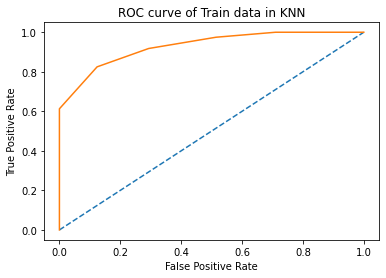

In [125]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = clfKNN.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in KNN');

AUC: 0.869


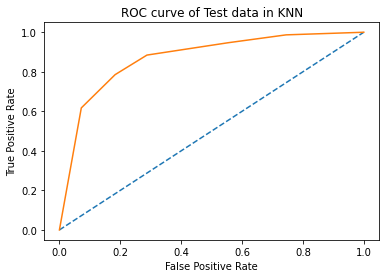

In [126]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = clfKNN.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in KNN');

AUC: 1.000


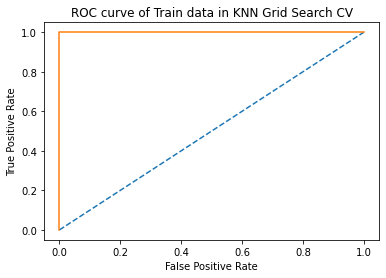

In [127]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_model_knn_gs.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc_gs = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc_gs)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in KNN Grid Search CV');

AUC: 0.885


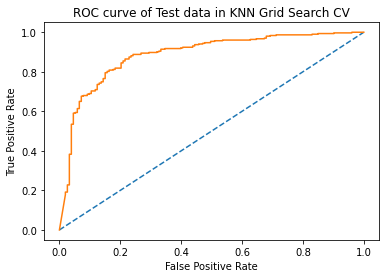

In [128]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_model_knn_gs.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc_gs = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc_gs)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in KNN Grid Search CV');

#### d) Naive bayes 

Train set Naive bayes score 0.8341187558906692
Test set Naive bayes score 0.8223684210526315


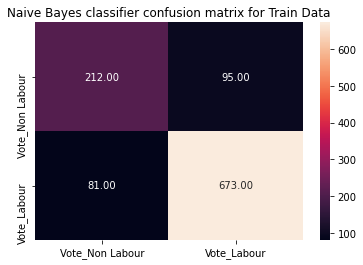

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



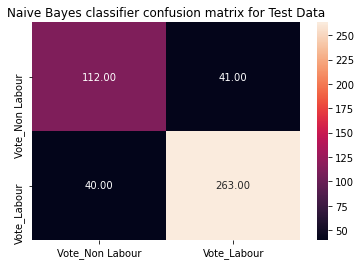

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

NB_train_precision_Labour  0.88
NB_train_recall_Labour  0.89
NB_train_f1_Labour  0.88
NB_train_precision_Conservative  0.72
NB_train_recall_Conservative  0.69
NB_train_f1_Conservative  0.71
NB_test_precision_Labour  0.87
NB_test_recall_Labour  0.87
NB_test_f1_Labour  0.87
NB_test_precision_Conservative  0.74
NB_test_recall_Conservative  0.73
NB_test_f1_Conservative  0.73


In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel('Election_Data (1).xlsx',sheet_name=1)
df.head()
df=df.drop('Unnamed: 0',axis=1)
df=df.drop_duplicates()
df=pd.get_dummies(df,drop_first=True)

# print(df['vote'].value_counts())
# df['vote']=pd.Categorical(df['vote']).codes
# print(df['vote'].value_counts())

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.columns.values:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

from scipy.stats import zscore

x=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']

x_s=x.apply(zscore)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.30,random_state=1)


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_train=model_NB.predict(x_train)
y_pred=model_NB.predict(x_test)
model_score_train = model_NB.score(x_train,y_train)
model_score = model_NB.score(x_test, y_test)
print('Train set Naive bayes score',model_score_train)
print('Test set Naive bayes score',model_score)
sns.heatmap(metrics.confusion_matrix(y_train,y_pred_train),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Naive Bayes classifier confusion matrix for Train Data')
plt.show()
print(metrics.classification_report(y_train,y_pred_train))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,xticklabels=['Vote_Non Labour','Vote_Labour']
           ,yticklabels=['Vote_Non Labour','Vote_Labour'],fmt='.2f')
plt.title('Naive Bayes classifier confusion matrix for Test Data')
plt.show()
print(metrics.classification_report(y_test,y_pred))

NB_metrics_train=classification_report(y_train, y_pred_train,output_dict=True)
NB_train=pd.DataFrame(NB_metrics_train).transpose()
NB_train
NB_train_precision_Labour=round(NB_train.loc['1.0'][0],2)
NB_train_recall_Labour=round(NB_train.loc['1.0'][1],2)
NB_train_f1_Labour=round(NB_train.loc['1.0'][2],2)
print ('NB_train_precision_Labour ',NB_train_precision_Labour)
print ('NB_train_recall_Labour ',NB_train_recall_Labour)
print ('NB_train_f1_Labour ',NB_train_f1_Labour)

NB_train_precision_Conservative=round(NB_train.loc['0.0'][0],2)
NB_train_recall_Conservative=round(NB_train.loc['0.0'][1],2)
NB_train_f1_Conservative=round(NB_train.loc['0.0'][2],2)
print ('NB_train_precision_Conservative ',NB_train_precision_Conservative)
print ('NB_train_recall_Conservative ',NB_train_recall_Conservative)
print ('NB_train_f1_Conservative ',NB_train_f1_Conservative)

NB_metrics_test=classification_report(y_test, y_pred,output_dict=True)
NB_test=pd.DataFrame(NB_metrics_test).transpose()

NB_test_precision_Labour=round(NB_test.loc['1.0'][0],2)
NB_test_recall_Labour=round(NB_test.loc['1.0'][1],2)
NB_test_f1_Labour=round(NB_test.loc['1.0'][2],2)
print ('NB_test_precision_Labour ',NB_test_precision_Labour)
print ('NB_test_recall_Labour ',NB_test_recall_Labour)
print ('NB_test_f1_Labour ',NB_test_f1_Labour)

NB_test_precision_Conservative=round(NB_test.loc['0.0'][0],2)
NB_test_recall_Conservative=round(NB_test.loc['0.0'][1],2)
NB_test_f1_Conservative=round(NB_test.loc['0.0'][2],2)
print ('NB_test_precision_Conservative ',NB_test_precision_Conservative)
print ('NB_test_recall_Conservative ',NB_test_recall_Conservative)
print ('NB_test_f1_Conservative ',NB_test_f1_Conservative)

In [137]:
from sklearn.model_selection import GridSearchCV

grid={'var_smoothing':[0,1e-9,1e-7, 1e-5,1e-1,1e-2,1e-3]}

model_NB_gs = GaussianNB()

grid_search_NB_gs = GridSearchCV(estimator = model_NB_gs, param_grid = grid, cv = 5)
grid_search_NB_gs.fit(x_train, y_train)

print(grid_search_NB_gs.best_params_,'\n')
print(grid_search_NB_gs.best_estimator_)

best_model_NB_gs = grid_search_NB_gs.best_estimator_

# Prediction on the training set

ytrain_predict_NB_gs = best_model_NB_gs.predict(x_train)
ytest_predict_NB_gs = best_model_NB_gs.predict(x_test)

## Getting the probabilities on the test set

ytest_predict_NB_gs_prob=best_model_NB_gs.predict_proba(x_test)
pd.DataFrame(ytest_predict_NB_gs_prob).head()

## Confusion matrix on the training data

metrics.confusion_matrix(y_train,ytrain_predict_NB_gs)
print(metrics.classification_report(y_train, ytrain_predict_NB_gs),'\n');

## Confusion matrix on the test data

metrics.confusion_matrix(y_test,ytest_predict_NB_gs)
print(metrics.classification_report(y_test, ytest_predict_NB_gs),'\n');

NB_metrics_train=classification_report(y_train, ytrain_predict_NB_gs,output_dict=True)
NB_train=pd.DataFrame(NB_metrics_train).transpose()
NB_train
NB_train_precision=round(NB_train.loc['1.0'][0],2)
NB_train_recall=round(NB_train.loc['1.0'][1],2)
NB_train_f1=round(NB_train.loc['1.0'][2],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_metrics_test=classification_report(y_test, ytest_predict_NB_gs,output_dict=True)
NB_test=pd.DataFrame(NB_metrics_test).transpose()

NB_test_precision=round(NB_test.loc['1.0'][0],2)
NB_test_recall=round(NB_test.loc['1.0'][1],2)
NB_test_f1=round(NB_test.loc['1.0'][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_metrics_train_gs=classification_report(y_train, ytrain_predict_NB_gs,output_dict=True)
NB_train_gs=pd.DataFrame(NB_metrics_train_gs).transpose()
NB_train_gs
NB_train_precision_gs_Labour=round(NB_train_gs.loc['1.0'][0],2)
NB_train_recall_gs_Labour=round(NB_train_gs.loc['1.0'][1],2)
NB_train_f1_gs_Labour=round(NB_train_gs.loc['1.0'][2],2)
print ('NB_train_precision_gs_Labour ',NB_train_precision_gs_Labour)
print ('NB_train_recall_gs_Labour ',NB_train_recall_gs_Labour)
print ('NB_train_f1_Labour ',NB_train_f1_gs_Labour)

NB_train_precision_gs_Conservative=round(NB_train_gs.loc['0.0'][0],2)
NB_train_recall_gs_Conservative=round(NB_train_gs.loc['0.0'][1],2)
NB_train_f1_gs_Conservative=round(NB_train_gs.loc['0.0'][2],2)
print ('NB_train_precision_gs_Conservative ',NB_train_precision_gs_Conservative)
print ('NB_train_recall_gs_Conservative ',NB_train_recall_gs_Conservative)
print ('NB_train_f1_gs_Conservative ',NB_train_f1_gs_Conservative)

NB_metrics_test_gs=classification_report(y_test, ytest_predict_NB_gs,output_dict=True)
NB_test_gs=pd.DataFrame(NB_metrics_test_gs).transpose()

NB_test_precision_gs_Labour=round(NB_test_gs.loc['1.0'][0],2)
NB_test_recall_gs_Labour=round(NB_test_gs.loc['1.0'][1],2)
NB_test_f1_gs_Labour=round(NB_test_gs.loc['1.0'][2],2)
print ('NB_test_precision_gs_Labour ',NB_test_precision_gs_Labour)
print ('NB_test_recall_gs_Labour ',NB_test_recall_gs_Labour)
print ('NB_test_f1_gs_Labour ',NB_test_f1_gs_Labour)

NB_test_precision_gs_Conservative=round(NB_test_gs.loc['0.0'][0],2)
NB_test_recall_gs_Conservative=round(NB_test_gs.loc['0.0'][1],2)
NB_test_f1_gs_Conservative=round(NB_test_gs.loc['0.0'][2],2)
print ('NB_test_precision_gs_Conservative ',NB_test_precision_gs_Conservative)
print ('NB_test_recall_gs_Conservative ',NB_test_recall_gs_Conservative)
print ('NB_test_f1_gs_Conservative ',NB_test_f1_gs_Conservative)

{'var_smoothing': 0} 

GaussianNB(var_smoothing=0)
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 

NB_train_precision  0.88
NB_train_recall  0.89
NB_train_f1  0.88
NB_test_precision  0.87
NB_test_recall  0.87
NB_test_f1  0.87
NB_train_precision_gs_Labour  0.88
NB_train_recall_gs_Labour  0.89
NB_train_f1_Labour  0.88
NB_train_precision_gs_Conservative  0.72
NB_train_recall_gs_Conservative

AUC: 0.889


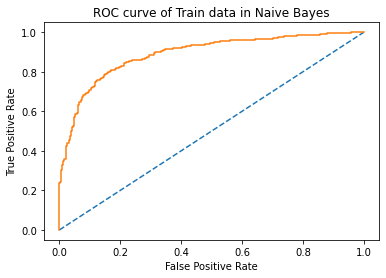

In [138]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_NB.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in Naive Bayes');

AUC: 0.876


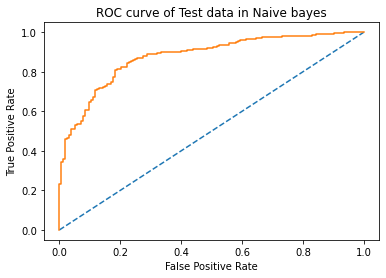

In [139]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_NB.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in Naive bayes');

AUC: 0.889


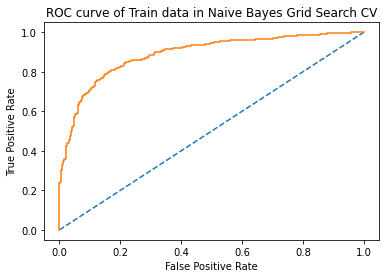

In [140]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_model_NB_gs.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc_gs = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc_gs)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Train data in Naive Bayes Grid Search CV');

AUC: 0.876


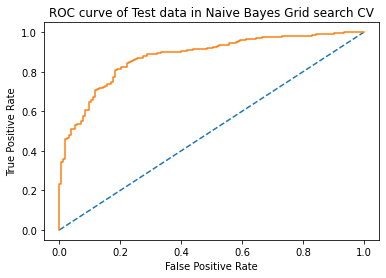

In [141]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = best_model_NB_gs.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc_gs = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc_gs)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve of Test data in Naive Bayes Grid search CV');

In [164]:
index=['Recall','Precision','F1 Score','Accuracy','AUC']
cumulative = pd.DataFrame({'Logit Train':[logit_train_recall_Labour,logit_train_precision_Labour,logit_train_f1_Labour,0.83,logit_train_auc],
        'Logit Test':[logit_test_recall_Labour,logit_test_precision_Labour,logit_test_f1_Labour,0.83,logit_test_auc],
       'Logit Train Grid search':[logit_train_recall_gs_Labour,logit_train_precision_gs_Labour,logit_train_f1_gs_Labour,0.84,logit_train_auc_gs],
        'Logit Test Grid search':[logit_test_recall_gs_Labour,logit_test_precision_gs_Labour,logit_test_f1_gs_Labour,0.82,logit_test_auc_gs],
       'LDA_Train':[lda_train_recall_Labour,lda_train_precision_Labour,lda_train_f1_Labour,round(model_scoreLDA_train,2),lda_train_auc ],
        'LDA_Test':[lda_test_recall_Labour,lda_test_precision_Labour,lda_test_f1_Labour,round(model_scoreLDA,2),lda_test_auc],
        'LDA Train Grid search':[lda_train_recall_gs_Labour,lda_train_precision_gs_Labour,lda_train_f1_gs_Labour,0.83,lda_train_auc_gs],
        'LDA Test Grid search' : [lda_test_recall_gs_Labour,lda_test_precision_gs_Labour,lda_test_f1_gs_Labour,0.83,lda_test_auc_gs],
        'KNN Train':[knn_train_recall_Labour,knn_train_precision_Labour,knn_train_f1_Labour,round(model_scoreKNN_train,2),knn_train_auc],
        'KNN Test':[knn_test_recall_Labour,knn_test_precision_Labour,knn_test_f1_Labour,round(model_scoreKNN,2),knn_test_auc],
        'KNN Train Grid Search':[knn_train_recall_gs_Labour,knn_train_precision_gs_Labour,knn_train_f1_gs_Labour,1,knn_train_auc_gs],
        'KNN Test Grid Search':[knn_test_recall_gs_Labour,knn_test_precision_gs_Labour,knn_test_f1_gs_Labour,0.83,knn_test_auc_gs],
        'Naive Train':[NB_train_recall_Labour,NB_train_precision_Labour,NB_train_f1_Labour,0.83,NB_train_auc],
        'Naive Test':[NB_test_recall_Labour,NB_test_precision_Labour,NB_test_f1_Labour,0.82,NB_test_auc],
        'Naive Train Grid Search':[NB_train_recall_gs_Labour,NB_train_precision_gs_Labour,NB_train_f1_gs_Labour,0.83,NB_train_auc_gs],
        'Naive Test Grid Search':[NB_test_recall_gs_Labour,NB_test_precision_gs_Labour,NB_test_f1_gs_Labour,0.82,NB_test_auc_gs],
        'Bagging Train':[bag_train_recall_Labour,bag_train_precision_Labour,bag_train_f1_Labour,bgcl_train_acc,bgcl_train_auc],
        'Bagging Test':[bag_test_recall_Labour,bag_test_precision_Labour,bag_test_f1_Labour,bgcl_test_acc,bgcl_test_auc],
        'Ada_Boost Train':[Ada_train_recall_Labour,Ada_train_precision_Labour,Ada_train_f1_Labour,model_scoreADB_train,Ada_train_auc],
        'Ada_Boost test':[Ada_test_recall_Labour,Ada_test_precision_Labour,Ada_test_f1_Labour,model_scoreADB,Ada_test_auc],
        'Grad_Boost Train':[Grad_train_recall_Labour,Grad_train_precision_Labour,Grad_train_f1_Labour,round(gbcl.score(x_train,y_train),2),Grad_train_auc ],
        'Grad_Boost Test':[Grad_test_recall_Labour,Grad_test_precision_Labour,Grad_test_f1_Labour,round(gbcl.score(x_test, y_test),2),Grad_test_auc],
        'Random Forest Train':[rf_train_recall,rf_train_precision,rf_train_f1,0.85,rf_train_auc],
        'Random Forest Test':[rf_test_recall,rf_test_precision,rf_test_f1,0.82,rf_test_auc]
                          },index=index)

round(cumulative,2).T

Recall  Precision  F1 Score  Accuracy   AUC
Logit Train                0.91       0.86      0.89      0.83  0.89
Logit Test                 0.88       0.86      0.87      0.83  0.88
Logit Train Grid search    0.92       0.86      0.89      0.84  0.89
Logit Test Grid search     0.88       0.86      0.87      0.82  0.88
LDA_Train                  0.91       0.86      0.89      0.83  0.89
LDA_Test                   0.88       0.86      0.87      0.83  0.89
LDA Train Grid search      0.90       0.87      0.88      0.83  0.89
LDA Test Grid search       0.88       0.86      0.87      0.83  0.89
KNN Train                  0.92       0.88      0.90      0.86  0.93
KNN Test                   0.88       0.86      0.87      0.83  0.87
KNN Train Grid Search      1.00       1.00      1.00      1.00  1.00
KNN Test Grid Search       0.92       0.84      0.88      0.83  0.89
Naive Train                0.89       0.88      0.88      0.83  0.89
Naive Test                 0.87       0.87      0.87      0.82  0.88
Naive Train Grid Search    0.89       0.88      0.88      0.83  0.89
Naive Test Grid Search     0.87       0.87      0.87      0.82  0.88
Bagging Train              0.94       0.90      0.92      0.97  1.00
Bagging Test               0.91       0.85      0.88      0.83  0.90
Ada_Boost Train            1.00       1.00      1.00      1.00  1.00
Ada_Boost test             0.91       0.84      0.87      0.82  0.89
Grad_Boost Train           0.94       0.90      0.92      0.88  0.94
Grad_Boost Test            0.91       0.85      0.88      0.83  0.90
Random Forest Train        0.91       0.88      0.89      0.85  0.91
Random Forest Test         0.88       0.85      0.87      0.82  0.89

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

Assessment of current national economic conditions , Assessment of current household economic conditions , Assessment of labor leader (Blair) and Hague play a crucial role .

Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

(Hint: use .words(), .raw(), .sent() for extracting counts)

In [8]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
print(inaugural.raw('1941-Roosevelt.txt'))
print('*******************************')
print(inaugural.raw('1961-Kennedy.txt'))
print('*******************************')
print(inaugural.raw('1973-Nixon.txt'))

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


### 2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

In [166]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')
b= inaugural.raw('1961-Kennedy.txt')
c=inaugural.raw('1973-Nixon.txt')

x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)
aabbcc

Speech  total_words  \
Roosvelt  On each national day of inauguration since 178...         1360   
Kennedy   Vice President Johnson, Mr. Speaker, Mr. Chief...         1390   
Nixon     Mr. Vice President, Mr. Speaker, Mr. Chief Jus...         1819   

          word_count  total_char  total_sent  
Roosvelt        1323        7571          69  
Kennedy         1364        7618          56  
Nixon           1769        9991          70

### 2.2 Remove all the stopwords from all three speeches. – 3 Marks

2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [189]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)


# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))

aabbcc['Speech'][0]


'on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states. in washington\'s day the task of the people was to create and weld together a nation. in lincoln\'s day the task of the people was to preserve that nation from disruption from within. in this day the task of the people is to save that nation and its institutions from disruption from without. to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction. lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live. there are men who doubt this. there are men who believe that democracy, as a form of 

In [190]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)
print(aabbcc)

# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
aabbcc

#b) Special character removal
aabbcc['Speech']= aabbcc['Speech'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
aabbcc['Speech'][0]

                                                     Speech  total_words  \
Roosvelt  On each national day of inauguration since 178...         1360   
Kennedy   Vice President Johnson, Mr. Speaker, Mr. Chief...         1390   
Nixon     Mr. Vice President, Mr. Speaker, Mr. Chief Jus...         1819   

          word_count  total_char  total_sent  
Roosvelt        1323        7571          69  
Kennedy         1364        7618          56  
Nixon           1769        9991          70  


'on each national day of inauguration since  the people have renewed their sense of dedication to the united states in washingtons day the task of the people was to create and weld together a nation in lincolns day the task of the people was to preserve that nation from disruption from within in this day the task of the people is to save that nation and its institutions from disruption from without to us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be if we do not we risk the real peril of inaction lives of nations are determined not by the count of years but by the lifetime of the human spirit the life of a man is threescore years and ten a little more a little less the life of a nation is the fullness of the measure of its will to live there are men who doubt this there are men who believe that democracy as a form of government and a frame of life

#### c) Stemming

In [192]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)


# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
aabbcc

#b) Special character removal
aabbcc['Speech']= aabbcc['Speech'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
aabbcc

#c) Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
aabbcc.Speech=aabbcc['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
aabbcc['Speech'][0]

'on each nation day of inaugur sinc the peopl have renew their sens of dedic to the unit state in washington day the task of the peopl wa to creat and weld togeth a nation in lincoln day the task of the peopl wa to preserv that nation from disrupt from within in thi day the task of the peopl is to save that nation and it institut from disrupt from without to us there ha come a time in the midst of swift happen to paus for a moment and take stock to recal what our place in histori ha been and to rediscov what we are and what we may be if we do not we risk the real peril of inact live of nation are determin not by the count of year but by the lifetim of the human spirit the life of a man is threescor year and ten a littl more a littl less the life of a nation is the full of the measur of it will to live there are men who doubt thi there are men who believ that democraci as a form of govern and a frame of life is limit or measur by a kind of mystic and artifici fate that for some unexplai

### Stop words

In [204]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)


# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
aabbcc

#b) Special character removal
aabbcc['Speech']= aabbcc['Speech'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
aabbcc

#c) Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
aabbcc.Speech=aabbcc['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
aabbcc

#d) removing Stop words

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please","have","has","us","and","this"])


all_words = [x for x in pd.Series(' '.join(aabbcc['Speech']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

all_words_Roosvelt=aabbcc['Speech'][0].split()
all_words_Kennedy=aabbcc['Speech'][1].split()
all_words_Nixon=aabbcc['Speech'][2].split()



all_words_clean = [word for word in all_words if word not in stopwords]

all_words_clean_Roosvelt = [word for word in all_words_Roosvelt if word not in stopwords]
all_words_clean_Kennedy = [word for word in all_words_Kennedy if word not in stopwords]
all_words_clean_Nixon = [word for word in all_words_Nixon if word not in stopwords]

aabbcc['word count After removal of stopwords']=[len(all_words_clean_Roosvelt),len(all_words_clean_Kennedy),len(all_words_clean_Nixon)]

aabbcc['Speech'][0]

'on each nation day of inaugur sinc the peopl have renew their sens of dedic to the unit state in washington day the task of the peopl wa to creat and weld togeth a nation in lincoln day the task of the peopl wa to preserv that nation from disrupt from within in thi day the task of the peopl is to save that nation and it institut from disrupt from without to us there ha come a time in the midst of swift happen to paus for a moment and take stock to recal what our place in histori ha been and to rediscov what we are and what we may be if we do not we risk the real peril of inact live of nation are determin not by the count of year but by the lifetim of the human spirit the life of a man is threescor year and ten a littl more a littl less the life of a nation is the full of the measur of it will to live there are men who doubt thi there are men who believ that democraci as a form of govern and a frame of life is limit or measur by a kind of mystic and artifici fate that for some unexplai

In [205]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)


# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
aabbcc

#b) Special character removal
aabbcc['Speech']= aabbcc['Speech'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
aabbcc

#c) Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
aabbcc.Speech=aabbcc['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
aabbcc

#d) removing Stop words

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please","have","has","us","and","this"])


all_words = [x for x in pd.Series(' '.join(aabbcc['Speech']).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

all_words_Roosvelt=aabbcc['Speech'][0].split()
all_words_Kennedy=aabbcc['Speech'][1].split()
all_words_Nixon=aabbcc['Speech'][2].split()



all_words_clean = [word for word in all_words if word not in stopwords]

all_words_clean_Roosvelt = [word for word in all_words_Roosvelt if word not in stopwords]
all_words_clean_Kennedy = [word for word in all_words_Kennedy if word not in stopwords]
all_words_clean_Nixon = [word for word in all_words_Nixon if word not in stopwords]

aabbcc['word count After removal of stopwords']=[len(all_words_clean_Roosvelt),len(all_words_clean_Kennedy),len(all_words_clean_Nixon)]

print('Sample after removal of stop words')
print('\n')
print(all_words_clean_Roosvelt)



Sample after removal of stop words


['nation', 'day', 'inaugur', 'sinc', 'peopl', 'renew', 'sens', 'dedic', 'unit', 'state', 'washington', 'day', 'task', 'peopl', 'wa', 'creat', 'weld', 'togeth', 'nation', 'lincoln', 'day', 'task', 'peopl', 'wa', 'preserv', 'nation', 'disrupt', 'within', 'thi', 'day', 'task', 'peopl', 'save', 'nation', 'institut', 'disrupt', 'without', 'ha', 'come', 'time', 'midst', 'swift', 'happen', 'paus', 'moment', 'take', 'stock', 'recal', 'place', 'histori', 'ha', 'rediscov', 'may', 'risk', 'real', 'peril', 'inact', 'live', 'nation', 'determin', 'count', 'year', 'lifetim', 'human', 'spirit', 'life', 'man', 'threescor', 'year', 'ten', 'littl', 'littl', 'less', 'life', 'nation', 'full', 'measur', 'live', 'men', 'doubt', 'thi', 'men', 'believ', 'democraci', 'form', 'govern', 'frame', 'life', 'limit', 'measur', 'kind', 'mystic', 'artifici', 'fate', 'unexplain', 'reason', 'tyranni', 'slaveri', 'becom', 'surg', 'wave', 'futur', 'freedom', 'eb', 'tide', 'american', 'kn

In [207]:
print("Sample after removal of stop words in all three sentences")
print('\n')
print(all_words_clean)

Sample after removal of stop words in all three sentences


['nation', 'day', 'inaugur', 'sinc', 'peopl', 'renew', 'sens', 'dedic', 'unit', 'state', 'washington', 'day', 'task', 'peopl', 'wa', 'creat', 'weld', 'togeth', 'nation', 'lincoln', 'day', 'task', 'peopl', 'wa', 'preserv', 'nation', 'disrupt', 'within', 'thi', 'day', 'task', 'peopl', 'save', 'nation', 'institut', 'disrupt', 'without', 'ha', 'come', 'time', 'midst', 'swift', 'happen', 'paus', 'moment', 'take', 'stock', 'recal', 'place', 'histori', 'ha', 'rediscov', 'may', 'risk', 'real', 'peril', 'inact', 'live', 'nation', 'determin', 'count', 'year', 'lifetim', 'human', 'spirit', 'life', 'man', 'threescor', 'year', 'ten', 'littl', 'littl', 'less', 'life', 'nation', 'full', 'measur', 'live', 'men', 'doubt', 'thi', 'men', 'believ', 'democraci', 'form', 'govern', 'frame', 'life', 'limit', 'measur', 'kind', 'mystic', 'artifici', 'fate', 'unexplain', 'reason', 'tyranni', 'slaveri', 'becom', 'surg', 'wave', 'futur', 'freedom', 'eb', 

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [208]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)


# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
aabbcc

#b) Special character removal
aabbcc['Speech']= aabbcc['Speech'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
aabbcc

#c) Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
aabbcc.Speech=aabbcc['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
aabbcc

#d) removing Stop words

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please","have","has","us","and","this"])


all_words = [x for x in pd.Series(' '.join(aabbcc['Speech']).split())] 

# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

all_words_Roosvelt=aabbcc['Speech'][0].split()
all_words_Kennedy=aabbcc['Speech'][1].split()
all_words_Nixon=aabbcc['Speech'][2].split()



all_words_clean = [word for word in all_words if word not in stopwords]

all_words_clean_Roosvelt = [word for word in all_words_Roosvelt if word not in stopwords]
all_words_clean_Kennedy = [word for word in all_words_Kennedy if word not in stopwords]
all_words_clean_Nixon = [word for word in all_words_Nixon if word not in stopwords]

aabbcc['word count After removal of stopwords']=[len(all_words_clean_Roosvelt),len(all_words_clean_Kennedy),len(all_words_clean_Nixon)]

# Creating a frequency distribution of the lower case words which does not contain any stopwords

all_words_freq_Roosvelt=nltk.FreqDist(all_words_clean_Roosvelt)
all_words_freq_Kennedy=nltk.FreqDist(all_words_clean_Kennedy)
all_words_freq_Nixon=nltk.FreqDist(all_words_clean_Nixon)


all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 

word_features_Roosvelt = [item[0] for item in all_words_freq_Roosvelt.most_common(5)]
word_features_Kennedy = [item[0] for item in all_words_freq_Kennedy.most_common(5)]
word_features_Nixon = [item[0] for item in all_words_freq_Nixon.most_common(5)]

word_features = [item[0] for item in all_words_freq.most_common(5)]

word_features_Roosvelt

['nation', 'thi', 'ha', 'know', 'peopl']

In [209]:
word_features_Kennedy 

['let', 'thi', 'power', 'world', 'nation']

In [210]:
word_features_Nixon

['let', 'america', 'peac', 'world', 'respons']

In [211]:
word_features

['nation', 'let', 'thi', 'america', 'world']

In [188]:
# from nltk.stem import WordNetLemmatizer
# lmtzr = WordNetLemmatizer()


# aabbcc['Speech']=aabbcc['Speech'].apply(lambda x: " ".join([lmtzr.lemmatize(x) for x in x.split()]))
# aabbcc

# #d) removing Stop words

# stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
# stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please","have","has"])


# all_words = [x for x in pd.Series(' '.join(aabbcc['Speech']).split())] 

# # 1st we are spliting each row of the dataframe into words.
# # 2nd we are joining all the above words with a space between them.
# # 3rd we are making a Series out of it.
# # 4th we we are extracting each word one by one and storing it in the variable all_Words.

# all_words_Roosvelt=aabbcc['Speech'][0].split()
# all_words_Kennedy=aabbcc['Speech'][1].split()
# all_words_Nixon=aabbcc['Speech'][2].split()



# all_words_clean = [word for word in all_words if word not in stopwords]

# all_words_clean_Roosvelt = [word for word in all_words_Roosvelt if word not in stopwords]
# all_words_clean_Kennedy = [word for word in all_words_Kennedy if word not in stopwords]
# all_words_clean_Nixon = [word for word in all_words_Nixon if word not in stopwords]

# aabbcc['word count After removal of stopwords']=[len(all_words_clean_Roosvelt),len(all_words_clean_Kennedy),len(all_words_clean_Nixon)]

# # Creating a frequency distribution of the lower case words which does not contain any stopwords

# all_words_freq_Roosvelt=nltk.FreqDist(all_words_clean_Roosvelt)
# all_words_freq_Kennedy=nltk.FreqDist(all_words_clean_Kennedy)
# all_words_freq_Nixon=nltk.FreqDist(all_words_clean_Nixon)


# all_words_freq = nltk.FreqDist(all_words_clean)

# # Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 

# word_features_Roosvelt = [item[0] for item in all_words_freq_Roosvelt.most_common(5)]
# word_features_Kennedy = [item[0] for item in all_words_freq_Kennedy.most_common(5)]
# word_features_Nixon = [item[0] for item in all_words_freq_Nixon.most_common(5)]

# word_features = [item[0] for item in all_words_freq.most_common(5)]

# word_features_Roosvelt

### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for Roosvelt Speech (after cleaning)!!


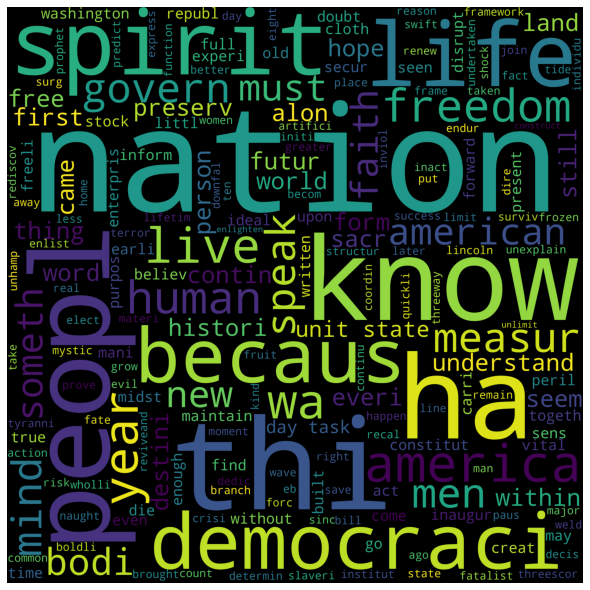

Word Cloud for Kennedy Speech (after cleaning)!!


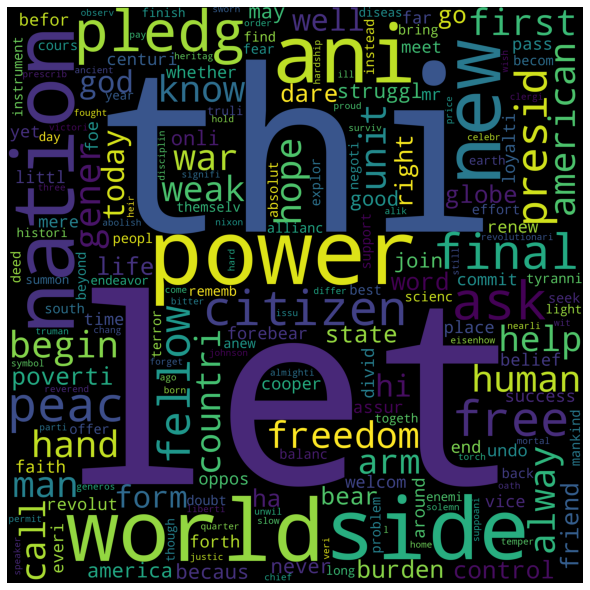

Word Cloud for Nixon Speech (after cleaning)!!


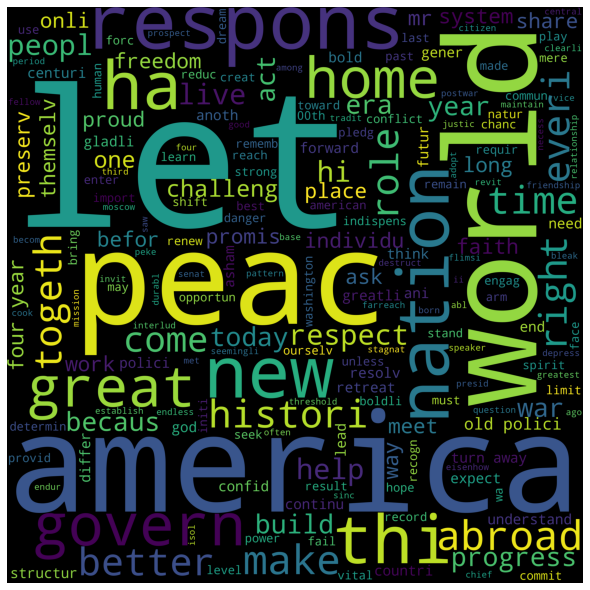

In [212]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)


# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
aabbcc

#b) Special character removal
aabbcc['Speech']= aabbcc['Speech'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
aabbcc

#c) Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
aabbcc.Speech=aabbcc['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
aabbcc

#d) removing Stop words

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please","have","has","us","and","this"])


all_words = [x for x in pd.Series(' '.join(aabbcc['Speech']).split())] 

# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

all_words_Roosvelt=aabbcc['Speech'][0].split()
all_words_Kennedy=aabbcc['Speech'][1].split()
all_words_Nixon=aabbcc['Speech'][2].split()



all_words_clean = [word for word in all_words if word not in stopwords]

all_words_clean_Roosvelt = [word for word in all_words_Roosvelt if word not in stopwords]
all_words_clean_Kennedy = [word for word in all_words_Kennedy if word not in stopwords]
all_words_clean_Nixon = [word for word in all_words_Nixon if word not in stopwords]

aabbcc['word count After removal of stopwords']=[len(all_words_clean_Roosvelt),len(all_words_clean_Kennedy),len(all_words_clean_Nixon)]

# Creating a frequency distribution of the lower case words which does not contain any stopwords

all_words_freq_Roosvelt=nltk.FreqDist(all_words_clean_Roosvelt)
all_words_freq_Kennedy=nltk.FreqDist(all_words_clean_Kennedy)
all_words_freq_Nixon=nltk.FreqDist(all_words_clean_Nixon)


all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 

word_features_Roosvelt = [item[0] for item in all_words_freq_Roosvelt.most_common(3)]
word_features_Kennedy = [item[0] for item in all_words_freq_Kennedy.most_common(3)]
word_features_Nixon = [item[0] for item in all_words_freq_Nixon.most_common(3)]

word_features = [item[0] for item in all_words_freq.most_common(3)]


from wordcloud import WordCloud,STOPWORDS

wc_r=' '.join(all_words_clean_Roosvelt)
wc_k=' '.join(all_words_clean_Kennedy)
wc_n=' '.join(all_words_clean_Nixon)


wordcloud_r = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_r) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosvelt Speech (after cleaning)!!")
plt.show()

wordcloud_k = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_k) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_k) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.show()

wordcloud_n = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_n) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Speech (after cleaning)!!")
plt.show()

Word Cloud for Roosvelt Speech (after cleaning)!!


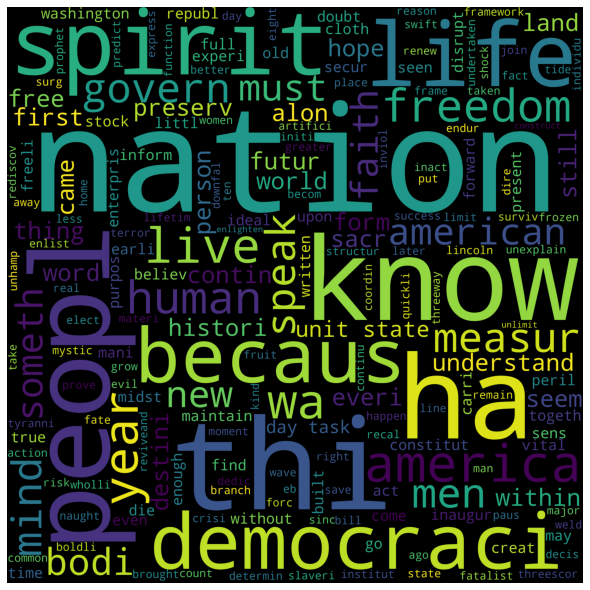

Word Cloud for Kennedy Speech (after cleaning)!!


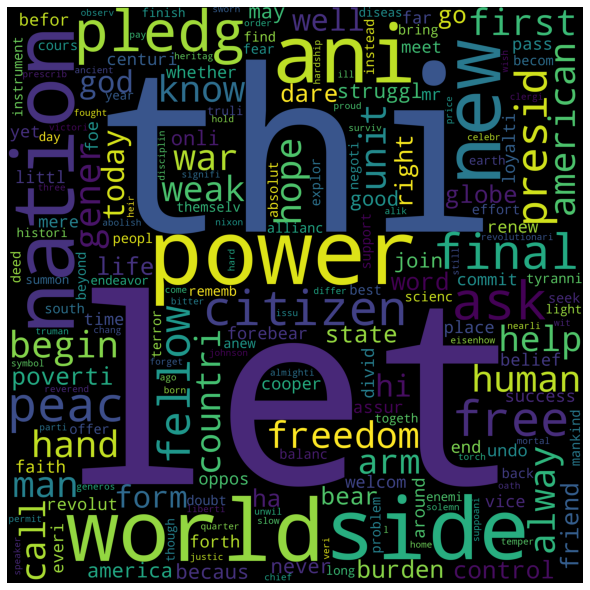

Word Cloud for Nixon Speech (after cleaning)!!


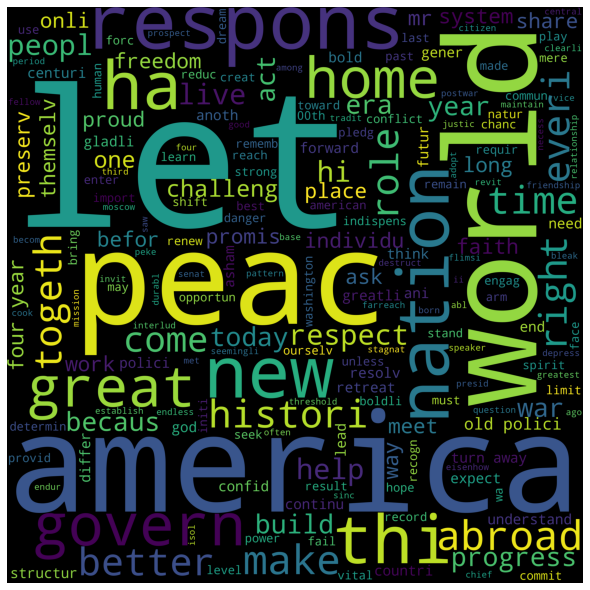

Word Cloud for three Speechs (after cleaning)!!


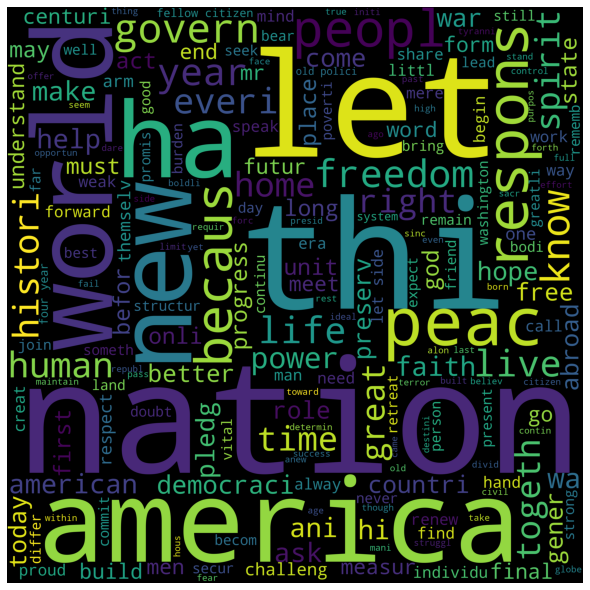

In [213]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import inaugural
inaugural.fileids()

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

a=inaugural.raw('1941-Roosevelt.txt')


x=[a]
y=[b]
z=[c]

aa=pd.DataFrame([x],columns=['Speech'],index=['Roosvelt'])
aa['total_words']=len(a.split())
aa['word_count']=len(str(a).split(" "))
aa['total_char']=len(str(a))
aa['total_sent']=len(str(a).split("."))

b= inaugural.raw('1961-Kennedy.txt')


bb=pd.DataFrame([y],columns=['Speech'],index=['Kennedy'])
bb['total_words']=len(b.split())
bb['word_count']=len(str(b).split(" "))
bb['total_char']=len(str(b))
bb['total_sent']=len(str(b).split("."))

c=inaugural.raw('1973-Nixon.txt')
cc=pd.DataFrame([z],columns=['Speech'],index=['Nixon'])

cc['total_words']=len(c.split())
cc['word_count']=len(str(c).split(" "))
cc['total_char']=len(str(c)) # number of characters including spaces
cc['total_sent']=len(str(c).split("."))

aabbcc=pd.concat([aa,bb,cc],axis=0)


# Preprocessing
#a) Lower case conversion
aabbcc['Speech'] = aabbcc['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
aabbcc

#b) Special character removal
aabbcc['Speech']= aabbcc['Speech'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
aabbcc

#c) Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
aabbcc.Speech=aabbcc['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
aabbcc

#d) removing Stop words

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please","have","has","us","and","this"])


all_words = [x for x in pd.Series(' '.join(aabbcc['Speech']).split())] 

# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

all_words_Roosvelt=aabbcc['Speech'][0].split()
all_words_Kennedy=aabbcc['Speech'][1].split()
all_words_Nixon=aabbcc['Speech'][2].split()



all_words_clean = [word for word in all_words if word not in stopwords]

all_words_clean_Roosvelt = [word for word in all_words_Roosvelt if word not in stopwords]
all_words_clean_Kennedy = [word for word in all_words_Kennedy if word not in stopwords]
all_words_clean_Nixon = [word for word in all_words_Nixon if word not in stopwords]

aabbcc['word count After removal of stopwords']=[len(all_words_clean_Roosvelt),len(all_words_clean_Kennedy),len(all_words_clean_Nixon)]

# Creating a frequency distribution of the lower case words which does not contain any stopwords

all_words_freq_Roosvelt=nltk.FreqDist(all_words_clean_Roosvelt)
all_words_freq_Kennedy=nltk.FreqDist(all_words_clean_Kennedy)
all_words_freq_Nixon=nltk.FreqDist(all_words_clean_Nixon)


all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 

word_features_Roosvelt = [item[0] for item in all_words_freq_Roosvelt.most_common(3)]
word_features_Kennedy = [item[0] for item in all_words_freq_Kennedy.most_common(3)]
word_features_Nixon = [item[0] for item in all_words_freq_Nixon.most_common(3)]

word_features = [item[0] for item in all_words_freq.most_common(3)]


from wordcloud import WordCloud,STOPWORDS

wc_r=' '.join(all_words_clean_Roosvelt)
wc_k=' '.join(all_words_clean_Kennedy)
wc_n=' '.join(all_words_clean_Nixon)

wc=' '.join(all_words_clean)


wordcloud_r = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_r) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosvelt Speech (after cleaning)!!")
plt.show()

wordcloud_k = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_k) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_k) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.show()

wordcloud_n = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_n) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Speech (after cleaning)!!")
plt.show()

wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for three Speechs (after cleaning)!!")
plt.show()